In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier
import lightgbm

import re

import graphviz

In [208]:
df_green = pd.read_csv(r"LabDataset\green_surface.csv", delimiter=";", low_memory=False)

In [209]:
df_gray = pd.read_csv(r"LabDataset\gray_surface.csv", delimiter=";", low_memory=False)

In [210]:
df_table = pd.read_csv(r"LabDataset\table_surface.csv", delimiter=";", low_memory=False)

In [211]:
df_table.head(10)

Movement direction Set robot speed along X axis  \
0             degree                          m/s   
1            movedir                    xsetspeed   
2                  0                          0.1   
3                  0                          0.1   
4                  0                          0.1   
5                  0                          0.1   
6                  0                          0.1   
7                  0                          0.1   
8                  0                          0.1   
9                  0                          0.1   

  Set robot speed along Y axis Set rotational robot velocity  \
0                          m/s                         rad/s   
1                    ysetspeed                        setvel   
2                            0                             0   
3                            0                             0   
4                            0                             0   
5                            0                             0   
6                            0                             0   
7                            0                             0   
8                            0                             0   
9                            0                             0   

  1st motor set speed 2st motor set speed 3st motor set speed  \
0               rad/s               rad/s               rad/s   
1            m1setvel            m2setvel            m3setvel   
2             -34.641                   0              34.641   
3             -34.641                   0              34.641   
4             -34.641                   0              34.641   
5             -34.641                   0              34.641   
6             -34.641                   0              34.641   
7             -34.641                   0              34.641   
8             -34.641                   0              34.641   
9             -34.641                   0              34.641   

  1st motor position 2nd motor position 3rd motor position  ...  \
0              ticks              ticks              ticks  ...   
1              m1pos              m2pos              m3pos  ...   
2               -844                  0                829  ...   
3              -1392                  7               1386  ...   
4              -1942                 -1               1939  ...   
5              -3028                 -4               3028  ...   
6              -3951                 -4               3942  ...   
7              -4691                 -4               4662  ...   
8              -5966                  8               5928  ...   
9              -6876                 -2               6845  ...   

  Wheel 2 effective velocity Wheel 2 slippage Motor 2 voltage Motor 2 torque  \
0                        rpm             none               V             Nm   
1                   w2effvel           w2slip           m2vol          m2tor   
2                          0                0               0            NaN   
3                          0                0               0            NaN   
4                          0                0               0            NaN   
5                          0                0               0            NaN   
6                          0                0               0            NaN   
7                          0                0               0            NaN   
8                          0                0               0            NaN   
9                          0                0               0            NaN   

  Wheel 3 velocity Wheel 3 effective velocity    Wheel 3 slippage  \
0              rpm                        rpm                none   
1            w3vel                   w3effvel              w3slip   
2         2.120575            1.9076167627645   0.100424760848121   
3         2.120575           1.89750707037142   0.105192190622157   
4        1.9438625           1.24

In [212]:
df_green.head(10)

Movement direction Set robot speed along X axis  \
0             degree                          m/s   
1            movedir                    xsetspeed   
2                  0                          0.1   
3                  0                          0.1   
4                  0                          0.1   
5                  0                          0.1   
6                  0                          0.1   
7                  0                          0.1   
8                  0                          0.1   
9                  0                          0.1   

  Set robot speed along Y axis Set rotational robot velocity  \
0                          m/s                         rad/s   
1                    ysetspeed                        setvel   
2                            0                             0   
3                            0                             0   
4                            0                             0   
5                            0                             0   
6                            0                             0   
7                            0                             0   
8                            0                             0   
9                            0                             0   

  1st motor set speed 2st motor set speed 3st motor set speed  \
0               rad/s               rad/s               rad/s   
1            m1setvel            m2setvel            m3setvel   
2             -34.641                   0              34.641   
3             -34.641                   0              34.641   
4             -34.641                   0              34.641   
5             -34.641                   0              34.641   
6             -34.641                   0              34.641   
7             -34.641                   0              34.641   
8             -34.641                   0              34.641   
9             -34.641                   0              34.641   

  1st motor position 2nd motor position 3rd motor position  ...  \
0              ticks              ticks              ticks  ...   
1              m1pos              m2pos              m3pos  ...   
2               -793                -19                762  ...   
3              -1265                -23               1219  ...   
4              -1576                -27               1524  ...   
5              -2617                -42               2551  ...   
6              -3055                -47               2982  ...   
7              -3346                -55               3259  ...   
8              -4372                -90               4294  ...   
9              -4663                -90               4597  ...   

  Wheel 2 effective velocity Wheel 2 slippage Motor 2 voltage  \
0                        rpm             none               V   
1                   w2effvel           w2slip           m2vol   
2                          0                0               0   
3                          0                0               0   
4                          0                0               0   
5                          0                0               0   
6                          0                0               0   
7                          0                0   -0.2784771831   
8                          0                0               0   
9                          0                0               0   

         Motor 2 torque Wheel 3 velocity Wheel 3 effective velocity  \
0                    Nm              rpm                        rpm   
1                 m2tor            w3vel                   w3effvel   
2                   NaN       1.76714375           1.31555800252581   
3                   NaN       1.76714375          0.659106354039713   
4                   NaN       1.76714375          0.656980302607232   
5                   NaN       1.59043125           1.29051576616357   
6                   NaN       1.59043125      

In [213]:
# Подготовим зеленый датафрейм

# Объявление фильтрованого датафрейма
df_green_f = df_green.drop("Unnamed: 43", axis=1)

# Удаление дубликатов строк
df_green_f = df_green_f.drop_duplicates()

# Удаление строк с NaN
df_green_f = df_green_f.dropna()

#Добавление строк в название столбца
df_green_f.columns = [col +', '+ str(df_green_f.loc[0, col]) +' ('+ str(df_green_f.loc[1, col])+')' for col in df_green_f.columns]

# Удаление строк с индексами 0 и 1
df_green_f = df_green_f.drop([0, 1], axis=0)

# Добавление стобца surface
df_green_f['surface'] = 0

# Сброс индексов
df_green_f = df_green_f.reset_index(drop=True)

# Приведем все типы данных к float
df_green_f = df_green_f.astype('float')

# Вывод результатов
display(df_green_f)
print("Доля оставшихся данных " + str(round(len(df_green_f)/len(df_green), 3)))
print("Доля удалённых данных " + str(round(1-len(df_green_f)/len(df_green),3)))
print("Число строк до фильтрации " + str(len(df_green)) + ". Число строк после фильтрации "+str(len(df_green_f)) + ". Число удалённых строк " + str(len(df_green)-len(df_green_f)) +".")

Movement direction, degree (movedir)  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
18668                                 355.0   
18669                                 355.0   
18670                                 355.0   
18671                                 355.0   
18672                                 355.0   

       Set robot speed along X axis, m/s (xsetspeed)  \
0                                           0.100000   
1                                           0.100000   
2                                           0.100000   
3                                           0.100000   
4                                           0.100000   
...                                              ...   
18668                                       0.099619   
18669                                       0.099619   
18670                                       0.099619   
18671                                       0.099619   
18672                                       0.099619   

       Set robot speed along Y axis, m/s (ysetspeed)  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.000000   
4                                           0.000000   
...                                              ...   
18668                                      -0.008716   
18669                                      -0.008716   
18670                                      -0.008716   
18671                                      -0.008716   
18672                                      -0.008716   

       Set rotational robot velocity, rad/s (setvel)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
18668                                            0.0   
18669                                            0.0   
18670                                            0.0   
18671                                            0.0   
18672                                            0.0   

       1st motor set speed, rad/s (m1setvel)  \
0                                   -34.6410   
1                                   -34.6410   
2                                   -34.6410   
3                                   -34.6410   
4                                   -34.6410   
...                                      ...   
18668                               -36.2523   
18669                               -36.2523   
18670                               -36.2523   
18671                               -36.2523   
18672                               -36.2523   

       2st motor set speed, rad/s (m2setvel)  \
0                                    0.00000   
1                                    0.00000   
2                                    0.00000   
3                                    0.00000   
4                                    0.00000   
...                                      ...   
18668                                3.48624   
18669                                3.48624   
18670                                3.48624   
18671                                3.48624   
18672                                3.48624   

       3st motor set speed, rad/s (m3setvel)  \
0                                    34.6410   
1                                    34.6410   
2                                    34.6410   
3                                    34.6410   
4                            

Доля оставшихся данных 0.734
Доля удалённых данных 0.266
Число строк до фильтрации 25437. Число строк после фильтрации 18673. Число удалённых строк 6764.


In [214]:
# Подготовим серый датафрейм

# Объявление фильтрованого датафрейма
df_gray_f = df_gray.drop("Unnamed: 43", axis=1)

# Удаление дубликатов строк
df_gray_f = df_gray_f.drop_duplicates()

# Удаление строк с NaN
df_gray_f = df_gray_f.dropna()

#Добавление строк в название столбца
df_gray_f.columns = [col +', '+ str(df_gray_f.loc[0, col]) +' ('+ str(df_gray_f.loc[1, col])+')' for col in df_gray_f.columns]

# Удаление строк с индексами 0 и 1
df_gray_f = df_gray_f.drop([0, 1], axis=0)

# Добавление стобца surface
df_gray_f['surface'] = 1

# Сброс индексов
df_gray_f = df_gray_f.reset_index(drop=True)

# Приведем все типы данных к float
df_gray_f = df_gray_f.astype('float')

# Вывод результатов
display(df_gray_f)
print("Доля оставшихся данных " + str(round(len(df_gray_f)/len(df_gray), 3)))
print("Доля удалённых данных " + str(round(1-len(df_gray_f)/len(df_gray),3)))
print("Число строк до фильтрации " + str(len(df_gray)) + ". Число строк после фильтрации "+str(len(df_gray_f)) + ". Число удалённых строк " + str(len(df_gray)-len(df_gray_f)) +".")

Movement direction, degree (movedir)  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
15617                                 355.0   
15618                                 355.0   
15619                                 355.0   
15620                                 355.0   
15621                                 355.0   

       Set robot speed along X axis, m/s (xsetspeed)  \
0                                           0.100000   
1                                           0.100000   
2                                           0.100000   
3                                           0.100000   
4                                           0.100000   
...                                              ...   
15617                                       0.099619   
15618                                       0.099619   
15619                                       0.099619   
15620                                       0.099619   
15621                                       0.099619   

       Set robot speed along Y axis, m/s (ysetspeed)  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.000000   
4                                           0.000000   
...                                              ...   
15617                                      -0.008716   
15618                                      -0.008716   
15619                                      -0.008716   
15620                                      -0.008716   
15621                                      -0.008716   

       Set rotational robot velocity, rad/s (setvel)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
15617                                            0.0   
15618                                            0.0   
15619                                            0.0   
15620                                            0.0   
15621                                            0.0   

       1st motor set speed, rad/s (m1setvel)  \
0                                   -34.6410   
1                                   -34.6410   
2                                   -34.6410   
3                                   -34.6410   
4                                   -34.6410   
...                                      ...   
15617                               -36.2523   
15618                               -36.2523   
15619                               -36.2523   
15620                               -36.2523   
15621                               -36.2523   

       2st motor set speed, rad/s (m2setvel)  \
0                                    0.00000   
1                                    0.00000   
2                                    0.00000   
3                                    0.00000   
4                                    0.00000   
...                                      ...   
15617                                3.48624   
15618                                3.48624   
15619                                3.48624   
15620                                3.48624   
15621                                3.48624   

       3st motor set speed, rad/s (m3setvel)  \
0                                    34.6410   
1                                    34.6410   
2                                    34.6410   
3                                    34.6410   
4                            

Доля оставшихся данных 0.725
Доля удалённых данных 0.275
Число строк до фильтрации 21560. Число строк после фильтрации 15622. Число удалённых строк 5938.


In [215]:
# Подготовим стол датафрейм

# Объявление фильтрованого датафрейма
df_table_f = df_table.drop("Unnamed: 43", axis=1)

# Удаление дубликатов строк
df_table_f = df_table_f.drop_duplicates()

# Удаление строк с NaN
df_table_f = df_table_f.dropna()

#Добавление строк в название столбца
df_table_f.columns = [col +', '+ str(df_table_f.loc[0, col]) +' ('+ str(df_table_f.loc[1, col])+')' for col in df_table_f.columns]

# Удаление строк с индексами 0 и 1
df_table_f = df_table_f.drop([0, 1], axis=0)

# Добавление стобца surface
df_table_f['surface'] = 2

# Сброс индексов
df_table_f = df_table_f.reset_index(drop=True)

# Приведем все типы данных к float
df_table_f = df_table_f.astype('float')

# Вывод результатов
display(df_table_f)
print("Доля оставшихся данных " + str(round(len(df_table_f)/len(df_table), 3)))
print("Доля удалённых данных " + str(round(1-len(df_table_f)/len(df_table),3)))
print("Число строк до фильтрации " + str(len(df_table)) + ". Число строк после фильтрации "+str(len(df_table_f)) + ". Число удалённых строк " + str(len(df_table)-len(df_table_f)) +".")

Movement direction, degree (movedir)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
5738                                 355.0   
5739                                 355.0   
5740                                 355.0   
5741                                 355.0   
5742                                 355.0   

      Set robot speed along X axis, m/s (xsetspeed)  \
0                                          0.100000   
1                                          0.100000   
2                                          0.100000   
3                                          0.100000   
4                                          0.100000   
...                                             ...   
5738                                       0.099619   
5739                                       0.099619   
5740                                       0.099619   
5741                                       0.099619   
5742                                       0.099619   

      Set robot speed along Y axis, m/s (ysetspeed)  \
0                                          0.000000   
1                                          0.000000   
2                                          0.000000   
3                                          0.000000   
4                                          0.000000   
...                                             ...   
5738                                      -0.008716   
5739                                      -0.008716   
5740                                      -0.008716   
5741                                      -0.008716   
5742                                      -0.008716   

      Set rotational robot velocity, rad/s (setvel)  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
5738                                            0.0   
5739                                            0.0   
5740                                            0.0   
5741                                            0.0   
5742                                            0.0   

      1st motor set speed, rad/s (m1setvel)  \
0                                  -34.6410   
1                                  -34.6410   
2                                  -34.6410   
3                                  -34.6410   
4                                  -34.6410   
...                                     ...   
5738                               -36.2523   
5739                               -36.2523   
5740                               -36.2523   
5741                               -36.2523   
5742                               -36.2523   

      2st motor set speed, rad/s (m2setvel)  \
0                                   0.00000   
1                                   0.00000   
2                                   0.00000   
3                                   0.00000   
4                                   0.00000   
...                                     ...   
5738                                3.48624   
5739                                3.48624   
5740                                3.48624   
5741                                3.48624   
5742                                3.48624   

      3st motor set speed, rad/s (m3setvel)  \
0                                   34.6410   
1                                   34.6410   
2                                   34.6410   
3                                   34.6410   
4                                   34.6410   
...                                     ...   
5738       

Доля оставшихся данных 0.755
Доля удалённых данных 0.245
Число строк до фильтрации 7606. Число строк после фильтрации 5743. Число удалённых строк 1863.


In [216]:
# Слияние датафреймов в один большой
df_com = pd.concat([df_green_f,df_gray_f,df_table_f], axis = 0)
df_com = df_com.reset_index(drop = True)

display(df_com)

Movement direction, degree (movedir)  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
40033                                 355.0   
40034                                 355.0   
40035                                 355.0   
40036                                 355.0   
40037                                 355.0   

       Set robot speed along X axis, m/s (xsetspeed)  \
0                                           0.100000   
1                                           0.100000   
2                                           0.100000   
3                                           0.100000   
4                                           0.100000   
...                                              ...   
40033                                       0.099619   
40034                                       0.099619   
40035                                       0.099619   
40036                                       0.099619   
40037                                       0.099619   

       Set robot speed along Y axis, m/s (ysetspeed)  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.000000   
4                                           0.000000   
...                                              ...   
40033                                      -0.008716   
40034                                      -0.008716   
40035                                      -0.008716   
40036                                      -0.008716   
40037                                      -0.008716   

       Set rotational robot velocity, rad/s (setvel)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
40033                                            0.0   
40034                                            0.0   
40035                                            0.0   
40036                                            0.0   
40037                                            0.0   

       1st motor set speed, rad/s (m1setvel)  \
0                                   -34.6410   
1                                   -34.6410   
2                                   -34.6410   
3                                   -34.6410   
4                                   -34.6410   
...                                      ...   
40033                               -36.2523   
40034                               -36.2523   
40035                               -36.2523   
40036                               -36.2523   
40037                               -36.2523   

       2st motor set speed, rad/s (m2setvel)  \
0                                    0.00000   
1                                    0.00000   
2                                    0.00000   
3                                    0.00000   
4                                    0.00000   
...                                      ...   
40033                                3.48624   
40034                                3.48624   
40035                                3.48624   
40036                                3.48624   
40037                                3.48624   

       3st motor set speed, rad/s (m3setvel)  \
0                                    34.6410   
1                                    34.6410   
2                                    34.6410   
3                                    34.6410   
4                            

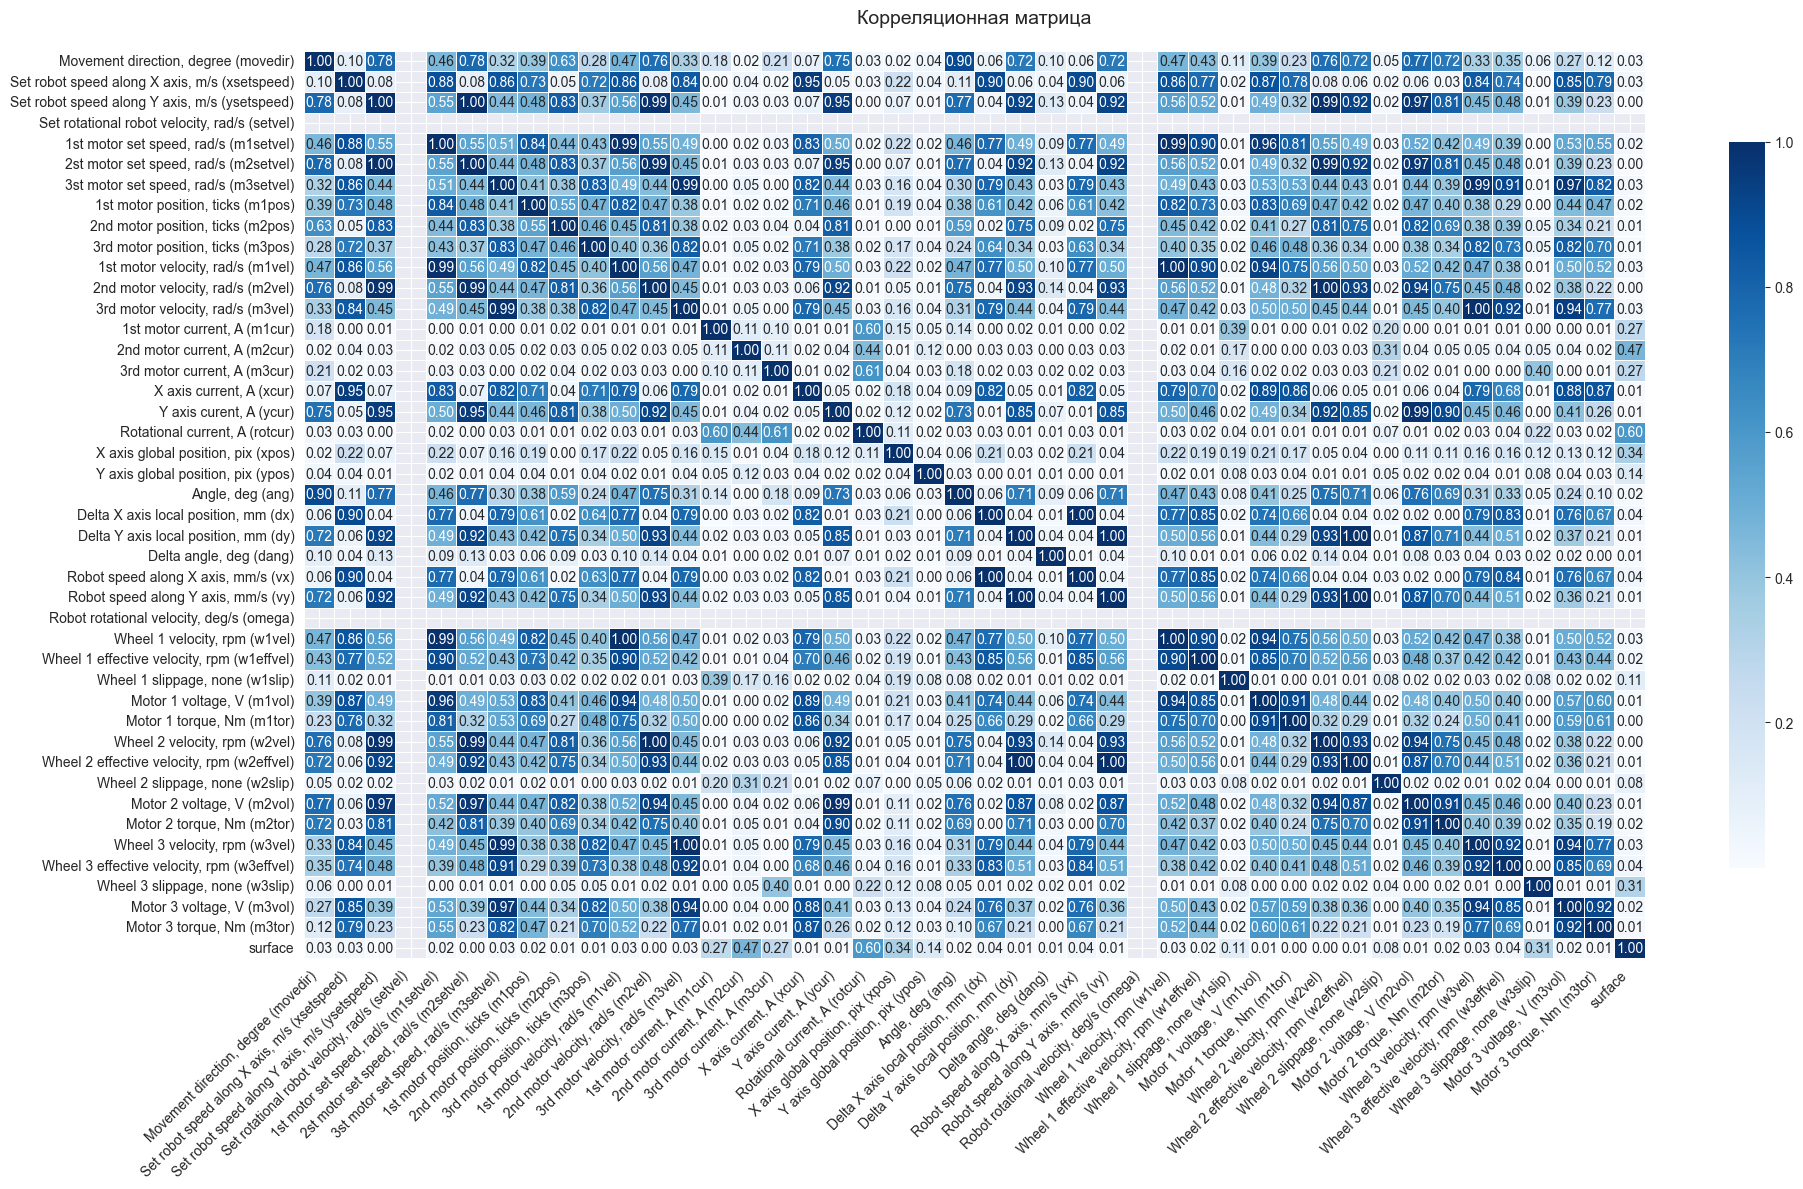

In [217]:
# Построим матрицу корреляции
plt.figure(figsize=(20, 12))  # Ширина x Высота (в дюймах)
# Создаем тепловую карту с настройками
ax = sns.heatmap(abs(df_com.corr()),
    annot=True,               # Подпись значений
    cbar=True,                # Подпись шкалы
    cmap='Blues',             # Цветовая схема
    fmt=".2f",                # Формат: 2 знака после запятой
    annot_kws={"size": 10},
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}  # Размер цветовой шкалы
)
# Настройка подписей осей
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10   # Размер шрифта
)
plt.yticks(
    rotation=0,    # Подписи слева без поворота
    fontsize=10
)
# Добавляем заголовок
plt.title("Корреляционная матрица", fontsize=14, pad=20)

# Настраиваем отступы
plt.tight_layout()
plt.savefig('correlation_matrix1.png', dpi=300)
# Показать график
plt.show()

In [218]:
#Выкинем из датафрейма данные, которые не влияют, или не должны влиять на работу моделей
df_com = df_com.drop("Set rotational robot velocity, rad/s (setvel)", axis=1)
df_com = df_com.drop("Robot rotational velocity, deg/s (omega)", axis=1)
df_com = df_com.drop("Delta angle, deg (dang)", axis=1)
df_com = df_com.drop("X axis global position, pix (xpos)", axis=1)
df_com = df_com.drop("Y axis global position, pix (ypos)", axis=1)
df_com = df_com.drop("Wheel 1 slippage, none (w1slip)", axis=1)
df_com = df_com.drop("Wheel 2 slippage, none (w2slip)", axis=1)
df_com = df_com.drop("Wheel 3 slippage, none (w3slip)", axis=1)
df_com = df_com.drop("Angle, deg (ang)", axis=1)
df_com = df_com.drop("Movement direction, degree (movedir)", axis=1)
df_com = df_com.drop("Set robot speed along X axis, m/s (xsetspeed)", axis=1)
df_com = df_com.drop("Set robot speed along Y axis, m/s (ysetspeed)", axis=1)
df_com = df_com.drop("1st motor position, ticks (m1pos)", axis=1)
df_com = df_com.drop("2nd motor position, ticks (m2pos)", axis=1)
df_com = df_com.drop("3rd motor position, ticks (m3pos)", axis=1)
df_com = df_com.drop("Delta X axis local position, mm (dx)", axis=1)
df_com = df_com.drop("Delta Y axis local position, mm (dy)", axis=1)
df_com = df_com.drop("Wheel 1 effective velocity, rpm (w1effvel)", axis=1)
df_com = df_com.drop("Wheel 2 effective velocity, rpm (w2effvel)", axis=1)
df_com = df_com.drop("Wheel 3 effective velocity, rpm (w3effvel)", axis=1)

df_com = df_com.reset_index(drop = True)
df_com.head(3)

1st motor set speed, rad/s (m1setvel)  \
0                                -34.641   
1                                -34.641   
2                                -34.641   

   2st motor set speed, rad/s (m2setvel)  \
0                                    0.0   
1                                    0.0   
2                                    0.0   

   3st motor set speed, rad/s (m3setvel)  1st motor velocity, rad/s (m1vel)  \
0                                 34.641                           -25.4469   
1                                 34.641                           -28.2743   
2                                 34.641                           -25.4469   

   2nd motor velocity, rad/s (m2vel)  3rd motor velocity, rad/s (m3vel)  \
0                           -2.82743                            25.4469   
1                            2.82743                            22.6195   
2                           -2.82743                            25.4469   

   1st motor current, A (m1cur)  2nd motor current, A (m2cur)  \
0                       1.12821                      0.025641   
1                       0.74359                      0.000000   
2                       1.12821                      0.025641   

   3rd motor current, A (m3cur)  X axis current, A (xcur)  ...  \
0                       1.00000                   1.22797  ...   
1                       1.35897                   1.21318  ...   
2                       1.00000                   1.22797  ...   

   Wheel 1 velocity, rpm (w1vel)  Motor 1 voltage, V (m1vol)  \
0                      -1.590431                   -7.295131   
1                      -1.767144                   -5.384413   
2                      -1.590431                   -7.295131   

   Motor 1 torque, Nm (m1tor)  Wheel 2 velocity, rpm (w2vel)  \
0                   -0.323436                      -0.176714   
1                   -0.141605                       0.176714   
2                   -0.323436                      -0.176714   

   Motor 2 voltage, V (m2vol)  Motor 2 torque, Nm (m2tor)  \
0                   -0.278477                   -0.002525   
1                    0.141654                    0.000000   
2                   -0.278477                   -0.002525   

   Wheel 3 velocity, rpm (w3vel)  Motor 3 voltage, V (m3vol)  \
0                       1.590431                    6.610990   
1                       1.413719                    8.384837   
2                       1.590431                    6.610990   

   Motor 3 torque, Nm (m3tor)  surface  
0                    0.259795      0.0  
1                    0.503757      0.0  
2                    0.259795      0.0  

[3 rows x 24 columns]

ERROR! Session/line number was not unique in database. History logging moved to new session 13


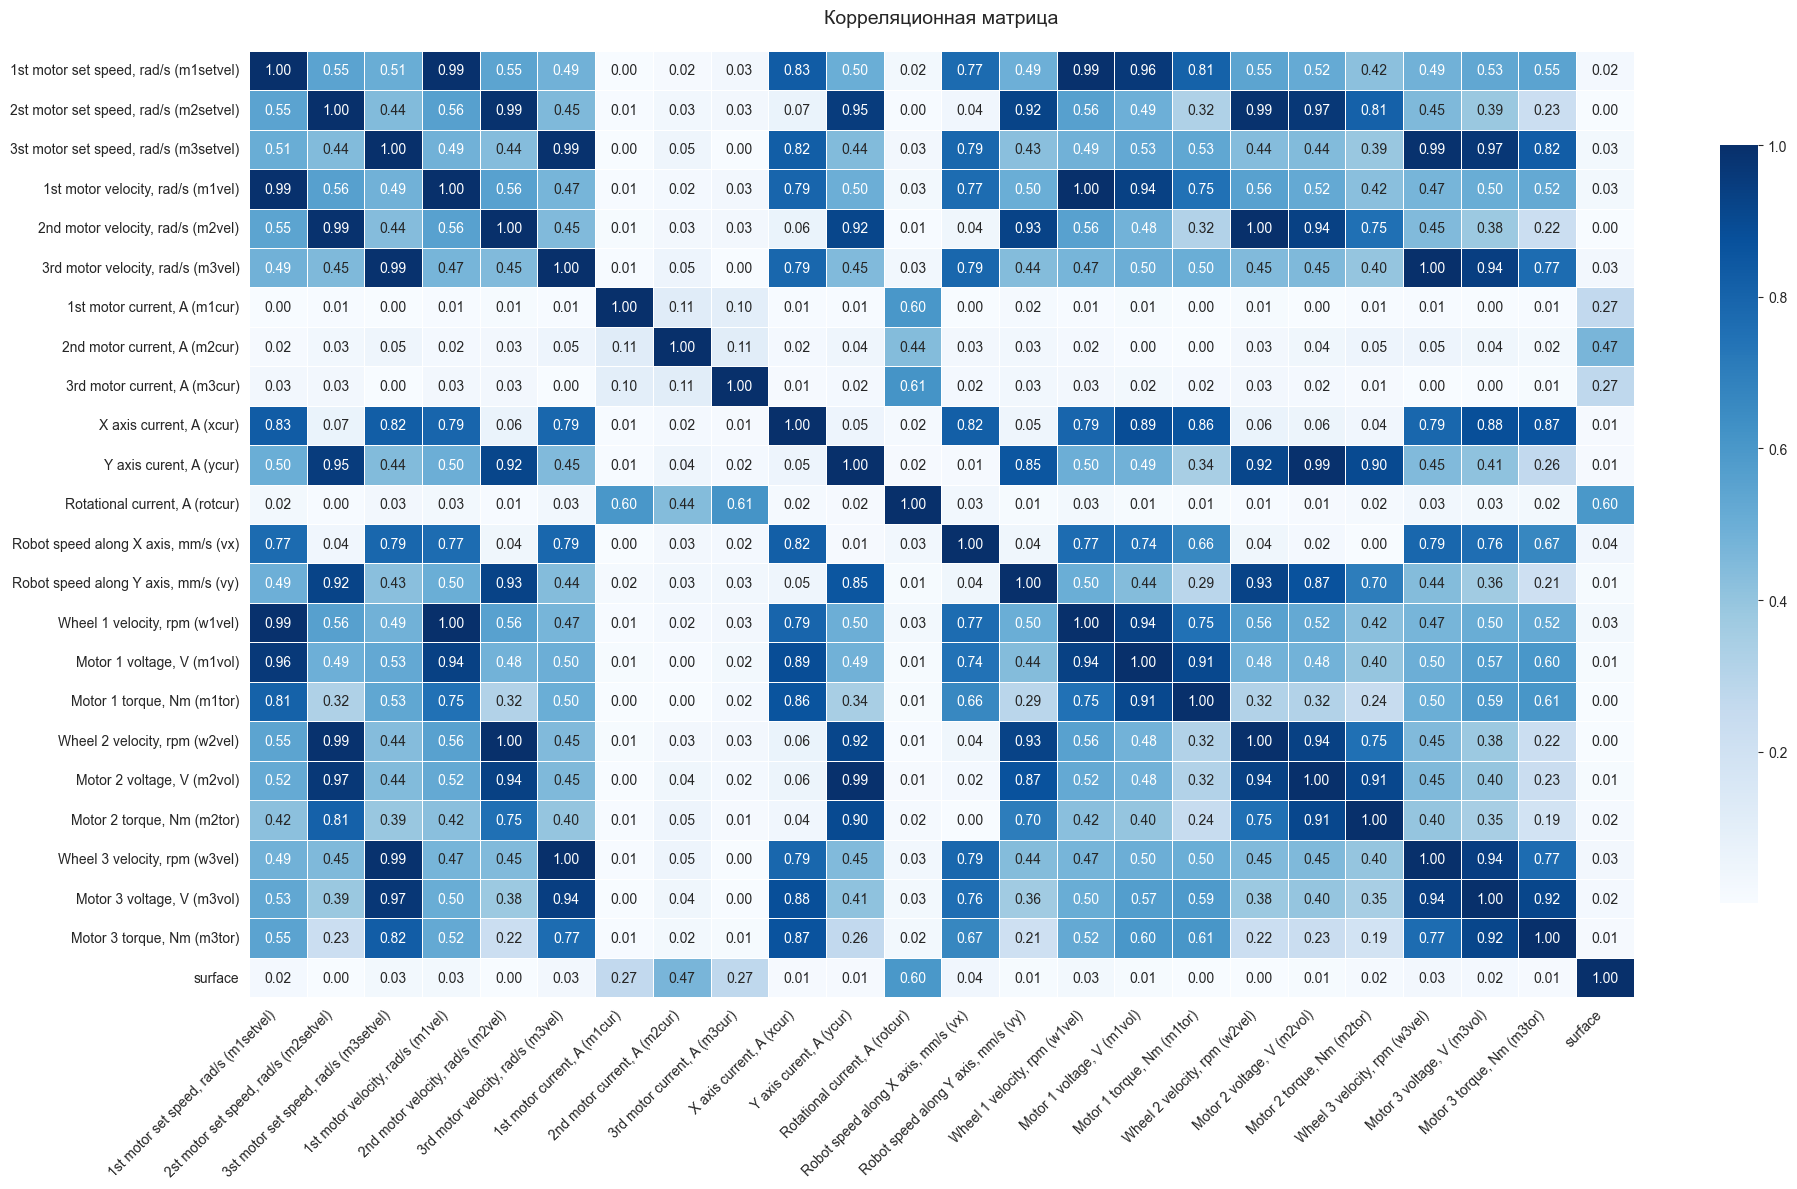

In [225]:
#Строим карту ещё раз

# Увеличиваем размер фигуры
plt.figure(figsize=(20, 12))  # Ширина x Высота (в дюймах)

# Создаем тепловую карту с настройками
ax = sns.heatmap(abs(df_com.corr()),
    annot=True,               # Подпись значений
    cbar=True,                # Подпись шкалы
    cmap='Blues',             # Цветовая схема
    fmt=".2f",                # Формат: 2 знака после запятой
    annot_kws={"size": 10},
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}  # Размер цветовой шкалы
)

# Настройка подписей осей
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10   # Размер шрифта
)

plt.yticks(
    rotation=0,    # Подписи слева без поворота
    fontsize=10
)

# Добавляем заголовок
plt.title("Корреляционная матрица", fontsize=14, pad=20)

# Настраиваем отступы
plt.tight_layout()
plt.savefig('correlation_matrix2.png', dpi=300)
# Показать график
plt.show()

In [220]:
#Нормализация общего датафрейма
scaler = MinMaxScaler(feature_range=(-1, 1))
normalised = scaler.fit_transform(df_com.drop('surface', axis=1))
df_com_norm = pd.DataFrame(normalised, columns = df_com.drop('surface', axis=1).columns)
df_com_norm['surface'] = df_com['surface']
df_com = df_com_norm
df_com_2 = df_com

display(df_com)

1st motor set speed, rad/s (m1setvel)  \
0                                  -0.866025   
1                                  -0.866025   
2                                  -0.866025   
3                                  -0.866025   
4                                  -0.866025   
...                                      ...   
40033                              -0.906308   
40034                              -0.906308   
40035                              -0.906308   
40036                              -0.906308   
40037                              -0.906308   

       2st motor set speed, rad/s (m2setvel)  \
0                                   0.000000   
1                                   0.000000   
2                                   0.000000   
3                                   0.000000   
4                                   0.000000   
...                                      ...   
40033                               0.087156   
40034                               0.087156   
40035                               0.087156   
40036                               0.087156   
40037                               0.087156   

       3st motor set speed, rad/s (m3setvel)  \
0                                   0.866025   
1                                   0.866025   
2                                   0.866025   
3                                   0.866025   
4                                   0.866025   
...                                      ...   
40033                               0.819153   
40034                               0.819153   
40035                               0.819153   
40036                               0.819153   
40037                               0.819153   

       1st motor velocity, rad/s (m1vel)  2nd motor velocity, rad/s (m2vel)  \
0                              -0.600000                          -0.066667   
1                              -0.666666                           0.066667   
2                              -0.600000                          -0.066667   
3                              -0.600000                          -0.066667   
4                              -0.600000                          -0.066667   
...                                  ...                                ...   
40033                          -0.666666                           0.066667   
40034                          -0.733334                           0.066667   
40035                          -0.800000                           0.066667   
40036                          -0.733334                           0.066667   
40037                          -0.733334                           0.066667   

       3rd motor velocity, rad/s (m3vel)  1st motor current, A (m1cur)  \
0                               0.600000                      0.113929   
1                               0.533334                     -0.265822   
2                               0.600000                      0.113929   
3                               0.733334                      0.189876   
4                               0.600000                      0.139245   
...                                  ...                           ...   
40033                           0.733334                     -0.746836   
40034                           0.733334                     -0.620253   
40035                           0.666666                     -0.746836   
40036                           0.666666                     -0.544304   
40037                           0.666666                     -0.721519   

       2nd motor current, A (m2cur)  3rd motor current, A (m3cur)  \
0                         -0.973684                      0.054052   
1                         -1.000000                      0.432425   
2                         -0.973684                      0.054052   
3                         -1.000000                     -0.027029   
4                         -0.921053                      0.135129   
...                     

In [221]:
#Разбиение на несколько векторов (Входы и выход)
X = df_com.drop(['surface'], axis = 1)
Y = df_com['surface']

#Разбиение датафрейма на обучающую, тестовую и контрольую выборку
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size = 0.3, random_state = 42)

print("Обучающая выборка " + str(len(X_train)) + ' строк (' + str(len(X_train)/40038) + ')')
print("Тествоая выборка " + str(len(X_test)) + ' строк (' + str(len(X_test)/40038) + ')')
print("Контрольная выборка " + str(len(X_val)) + ' строк (' + str(len(X_val)/40038) + ')')
print('Сумма: ' + str(len(X_train)+len(X_val)+len(X_test)) + ' (' + str(len(X_train)/40038 + len(X_val)/40038 + len(X_test)/40038) + ')')

Обучающая выборка 28026 строк (0.6999850142364753)
Тествоая выборка 3604 строк (0.09001448623807383)
Контрольная выборка 8408 строк (0.21000049952545083)
Сумма: 40038 (1.0)


In [222]:
#Дерево - около 80
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth= 15, min_samples_split= 2, random_state=42)

# Обучаем модель
clf_tree.fit(X_train, Y_train)

# Делаем предсказания
predictions0_tree = clf_tree.predict(X_train)
predictions1_tree = clf_tree.predict(X_val)
predictions2_tree = clf_tree.predict(X_test)

# Оцениваем точность модели
accuracy0_tree = metrics.accuracy_score(Y_train, predictions0_tree)
accuracy1_tree = metrics.accuracy_score(Y_val, predictions1_tree)
accuracy2_tree = metrics.accuracy_score(Y_test, predictions2_tree)

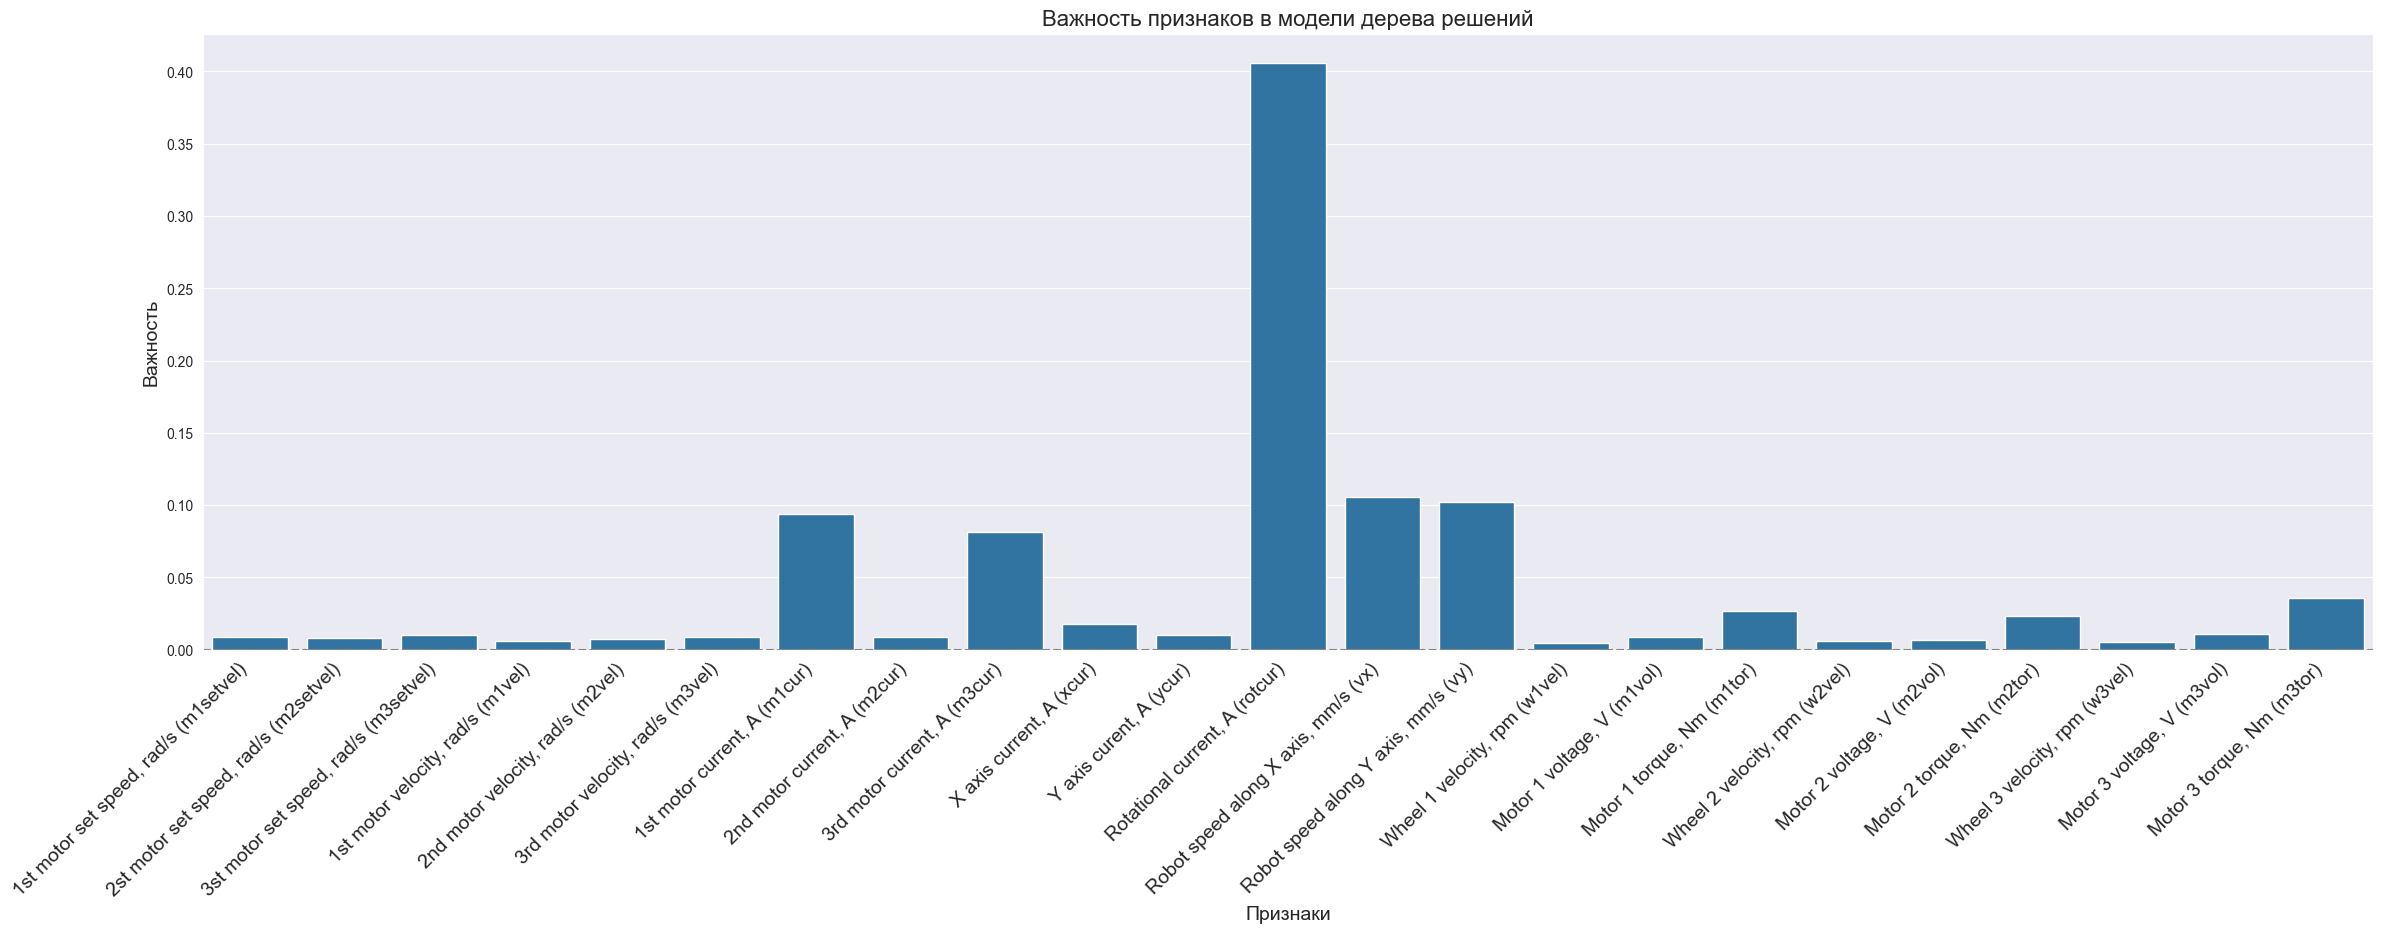

In [223]:
importances = clf_tree.feature_importances_
feature_names = X.columns.tolist()


plt.figure(figsize=(28, 8))
sns.barplot(x=feature_names, y=importances)

# Настройка заголовка и меток
plt.title('Важность признаков в модели дерева решений', fontsize=16)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Важность', fontsize=14)
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=14
)
plt.axhline(0, color='grey', linestyle='--')
plt.show()

In [226]:
#Вывод точности дерева
print(f'Accuracy train: {accuracy0_tree:.2f}')
print(f'Accuracy val : {accuracy1_tree:.2f}')
print(f'Accuracy test: {accuracy2_tree:.2f}')
print('\n')

report = metrics.classification_report(Y_train, predictions0_tree)
print("Classification Report train:\n", report)
print('\n')

report = metrics.classification_report(Y_val, predictions1_tree)
print("Classification Report val:\n", report)
print('\n')

report = metrics.classification_report(Y_test, predictions2_tree)
print("Classification Report test:\n", report)
print('\n')

Accuracy train: 0.90
Accuracy val : 0.80
Accuracy test: 0.80


Classification Report train:
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89     13047
         1.0       0.91      0.82      0.86     10947
         2.0       1.00      0.99      1.00      4032

    accuracy                           0.90     28026
   macro avg       0.92      0.91      0.92     28026
weighted avg       0.90      0.90      0.90     28026



Classification Report val:
               precision    recall  f1-score   support

         0.0       0.77      0.84      0.80      3927
         1.0       0.78      0.69      0.73      3257
         2.0       1.00      0.99      0.99      1224

    accuracy                           0.80      8408
   macro avg       0.85      0.84      0.84      8408
weighted avg       0.80      0.80      0.80      8408



Classification Report test:
               precision    recall  f1-score   support

         0.0       0.77      

In [224]:
#Рендер дерева в PDF
Y22 = Y.astype(str)
dot_data = tree.export_graphviz(clf_tree,
                                 out_file=None,
                                 feature_names=X.columns,
                                 class_names=np.unique(Y22),
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='pdf', cleanup=True)
# Сохраняем PDF в текущую директорию
pdf_path = 'decision_tree.pdf'
graph.render(
    filename=pdf_path.split('.')[0],  # Без расширения (автоматически добавит .pdf)
    format='pdf',
    cleanup=True  # Удаляет временные файлы
)


KeyboardInterrupt


KeyboardInterrupt



In [227]:
#Случайынй лес... точность около 90, вроде как
Random_Forest = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)
Random_Forest.fit(X_train, Y_train)

Y_pred_train = Random_Forest.predict(X_train)
Y_pred_val = Random_Forest.predict(X_val)
Y_pred_test = Random_Forest.predict(X_test)

In [228]:
#Вывод точности случайного леса
print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_val, Y_pred_val))
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     13047
         1.0       0.97      0.92      0.94     10947
         2.0       1.00      1.00      1.00      4032

    accuracy                           0.96     28026
   macro avg       0.97      0.96      0.96     28026
weighted avg       0.96      0.96      0.96     28026

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      3927
         1.0       0.81      0.77      0.79      3257
         2.0       1.00      0.99      1.00      1224

    accuracy                           0.84      8408
   macro avg       0.87      0.87      0.87      8408
weighted avg       0.84      0.84      0.84      8408

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1699
         1.0       0.81      0.79      0.80      1418
         2.0       1.00      0.99      1.00       487

    accuracy        

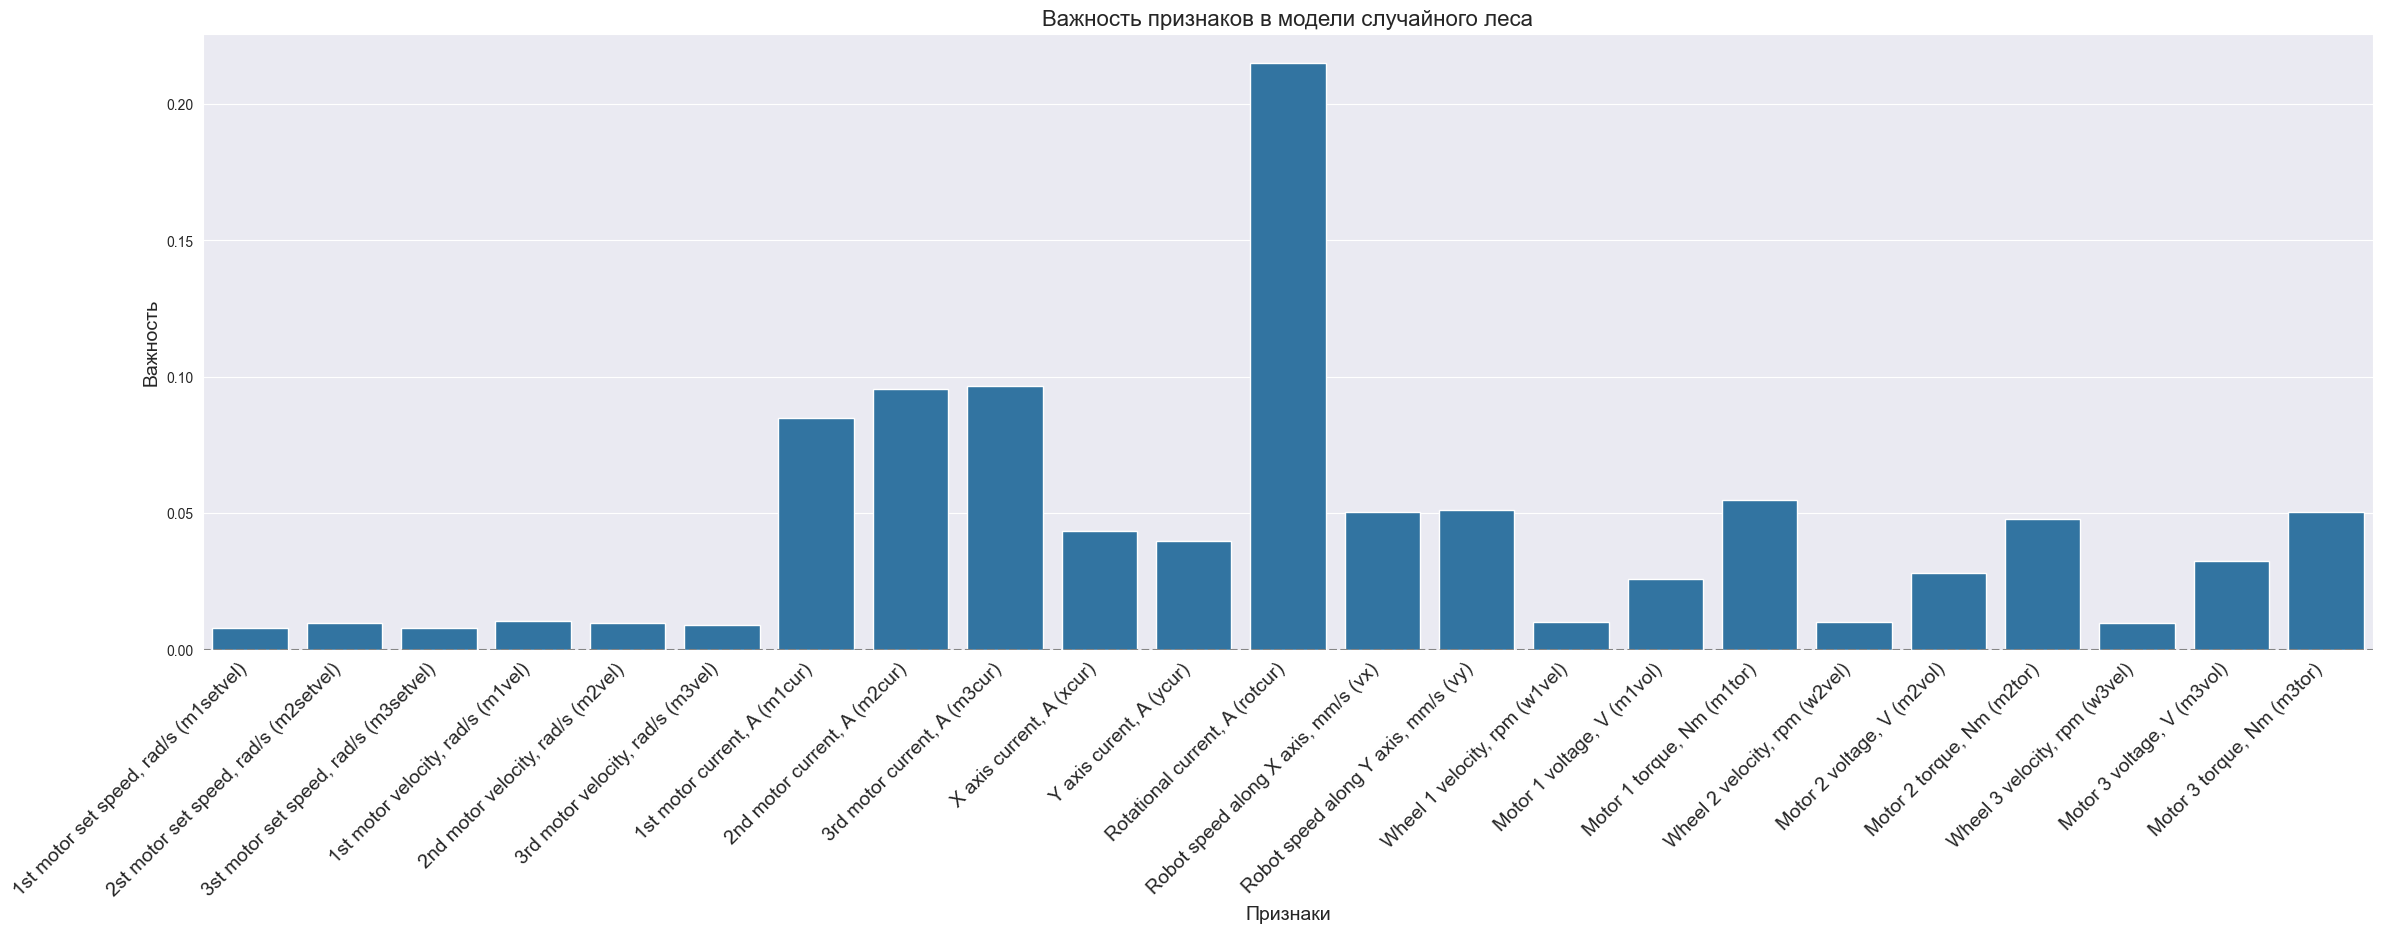

In [229]:
importances = Random_Forest.feature_importances_
feature_names = X.columns.tolist()


plt.figure(figsize=(28, 8))
sns.barplot(x=feature_names, y=importances)

# Настройка заголовка и меток
plt.title('Важность признаков в модели случайного леса', fontsize=16)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Важность', fontsize=14)
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=14
)
plt.axhline(0, color='grey', linestyle='--')
plt.show()

In [230]:
#CAT boost

# Создание и обучение модели с автоматической обработкой категориальных данных
model_CatBoost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
model_CatBoost.fit(X_train, Y_train, eval_set=(X_val, Y_val), plot=True)

Y_pred_train_cat = model_CatBoost.predict(X_train)
Y_pred_val_cat = model_CatBoost.predict(X_val)
Y_pred_test_cat = model_CatBoost.predict(X_test)

# Оценка производительности модели
accuracy1 = model_CatBoost.score(X_train, Y_train)
accuracy2 = model_CatBoost.score(X_val, Y_val)
accuracy3 = model_CatBoost.score(X_test, Y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0179060	test: 1.0181675	best: 1.0181675 (0)	total: 25.1ms	remaining: 25.1s
1:	learn: 0.9506696	test: 0.9507931	best: 0.9507931 (1)	total: 41.9ms	remaining: 20.9s
2:	learn: 0.8928804	test: 0.8928994	best: 0.8928994 (2)	total: 58.7ms	remaining: 19.5s
3:	learn: 0.8461924	test: 0.8459882	best: 0.8459882 (3)	total: 74.8ms	remaining: 18.6s
4:	learn: 0.8058717	test: 0.8056164	best: 0.8056164 (4)	total: 94.7ms	remaining: 18.9s
5:	learn: 0.7682300	test: 0.7679260	best: 0.7679260 (5)	total: 115ms	remaining: 19s
6:	learn: 0.7361618	test: 0.7361052	best: 0.7361052 (6)	total: 140ms	remaining: 19.8s
7:	learn: 0.7056728	test: 0.7053464	best: 0.7053464 (7)	total: 156ms	remaining: 19.4s
8:	learn: 0.6802722	test: 0.6796625	best: 0.6796625 (8)	total: 174ms	remaining: 19.1s
9:	learn: 0.6583467	test: 0.6580056	best: 0.6580056 (9)	total: 189ms	remaining: 18.7s
10:	learn: 0.6368410	test: 0.6363594	best: 0.6363594 (10)	total: 204ms	remaining: 18.4s
11:	learn: 0.6188302	test: 0.6187391	best: 0.6187

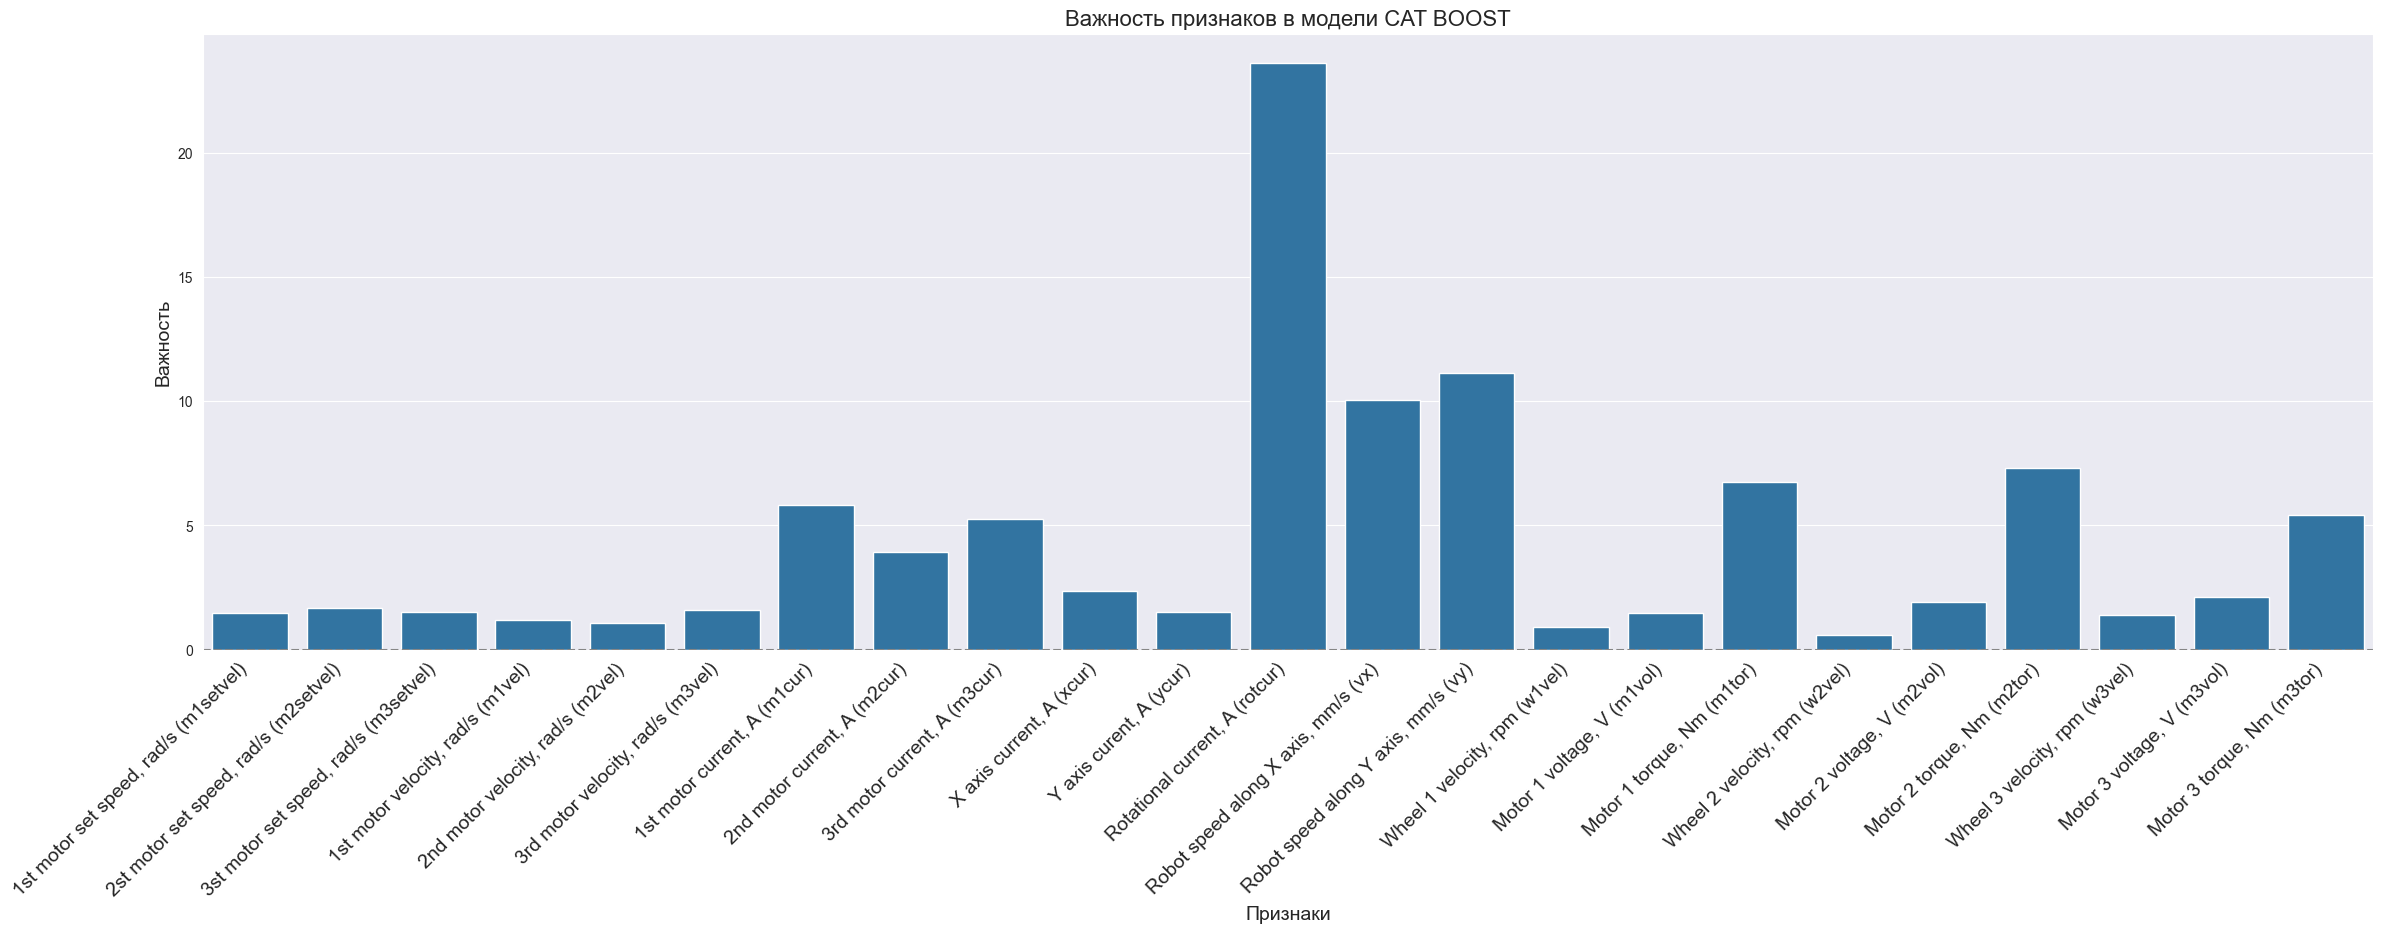

In [231]:
CAT_BOOST_parameters = model_CatBoost.feature_importances_
feature_names = X.columns.tolist()  # Автоматическое получение названий признаков

# Создание столбчатой диаграммы
plt.figure(figsize=(28, 8))  # Увеличение размера графика
sns.barplot(x=feature_names, y=CAT_BOOST_parameters)

# Настройка заголовка и меток
plt.title('Важность признаков в модели CAT BOOST', fontsize=16)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Важность', fontsize=14)
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=14
)
plt.axhline(0, color='grey', linestyle='--')  # Линия на уровне 0
plt.show()

In [232]:
print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_val, Y_pred_val))
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     13047
         1.0       0.97      0.92      0.94     10947
         2.0       1.00      1.00      1.00      4032

    accuracy                           0.96     28026
   macro avg       0.97      0.96      0.96     28026
weighted avg       0.96      0.96      0.96     28026

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      3927
         1.0       0.81      0.77      0.79      3257
         2.0       1.00      0.99      1.00      1224

    accuracy                           0.84      8408
   macro avg       0.87      0.87      0.87      8408
weighted avg       0.84      0.84      0.84      8408

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1699
         1.0       0.81      0.79      0.80      1418
         2.0       1.00      0.99      1.00       487

    accuracy        

In [233]:
X_train_lgbm = X_train
X_val_lgbm = X_val
X_test_lgbm = X_test

X_train_lgbm.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col) for col in X_train.columns]
X_val_lgbm.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col) for col in X_val.columns]
X_test_lgbm.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col) for col in X_test.columns]

model_LGBMC = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    random_state=42
)

model_LGBMC.fit(X_train_lgbm, Y_train)

Y_pred_train = model_LGBMC.predict(X_train_lgbm)
Y_pred_val = model_LGBMC.predict(X_val_lgbm)
Y_pred_test = model_LGBMC.predict(X_test_lgbm)


accuracy = accuracy_score(Y_test, Y_pred_test)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_val = accuracy_score(Y_val, Y_pred_val)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 28026, number of used features: 23
[LightGBM] [Info] Start training from score -0.764574
[LightGBM] [Info] Start training from score -0.940067
[LightGBM] [Info] Start training from score -1.938870


In [234]:
print(accuracy_train)
print(accuracy_val)
print(accuracy_test)

0.8893170627274674
0.8538296860133207
0.8504439511653719


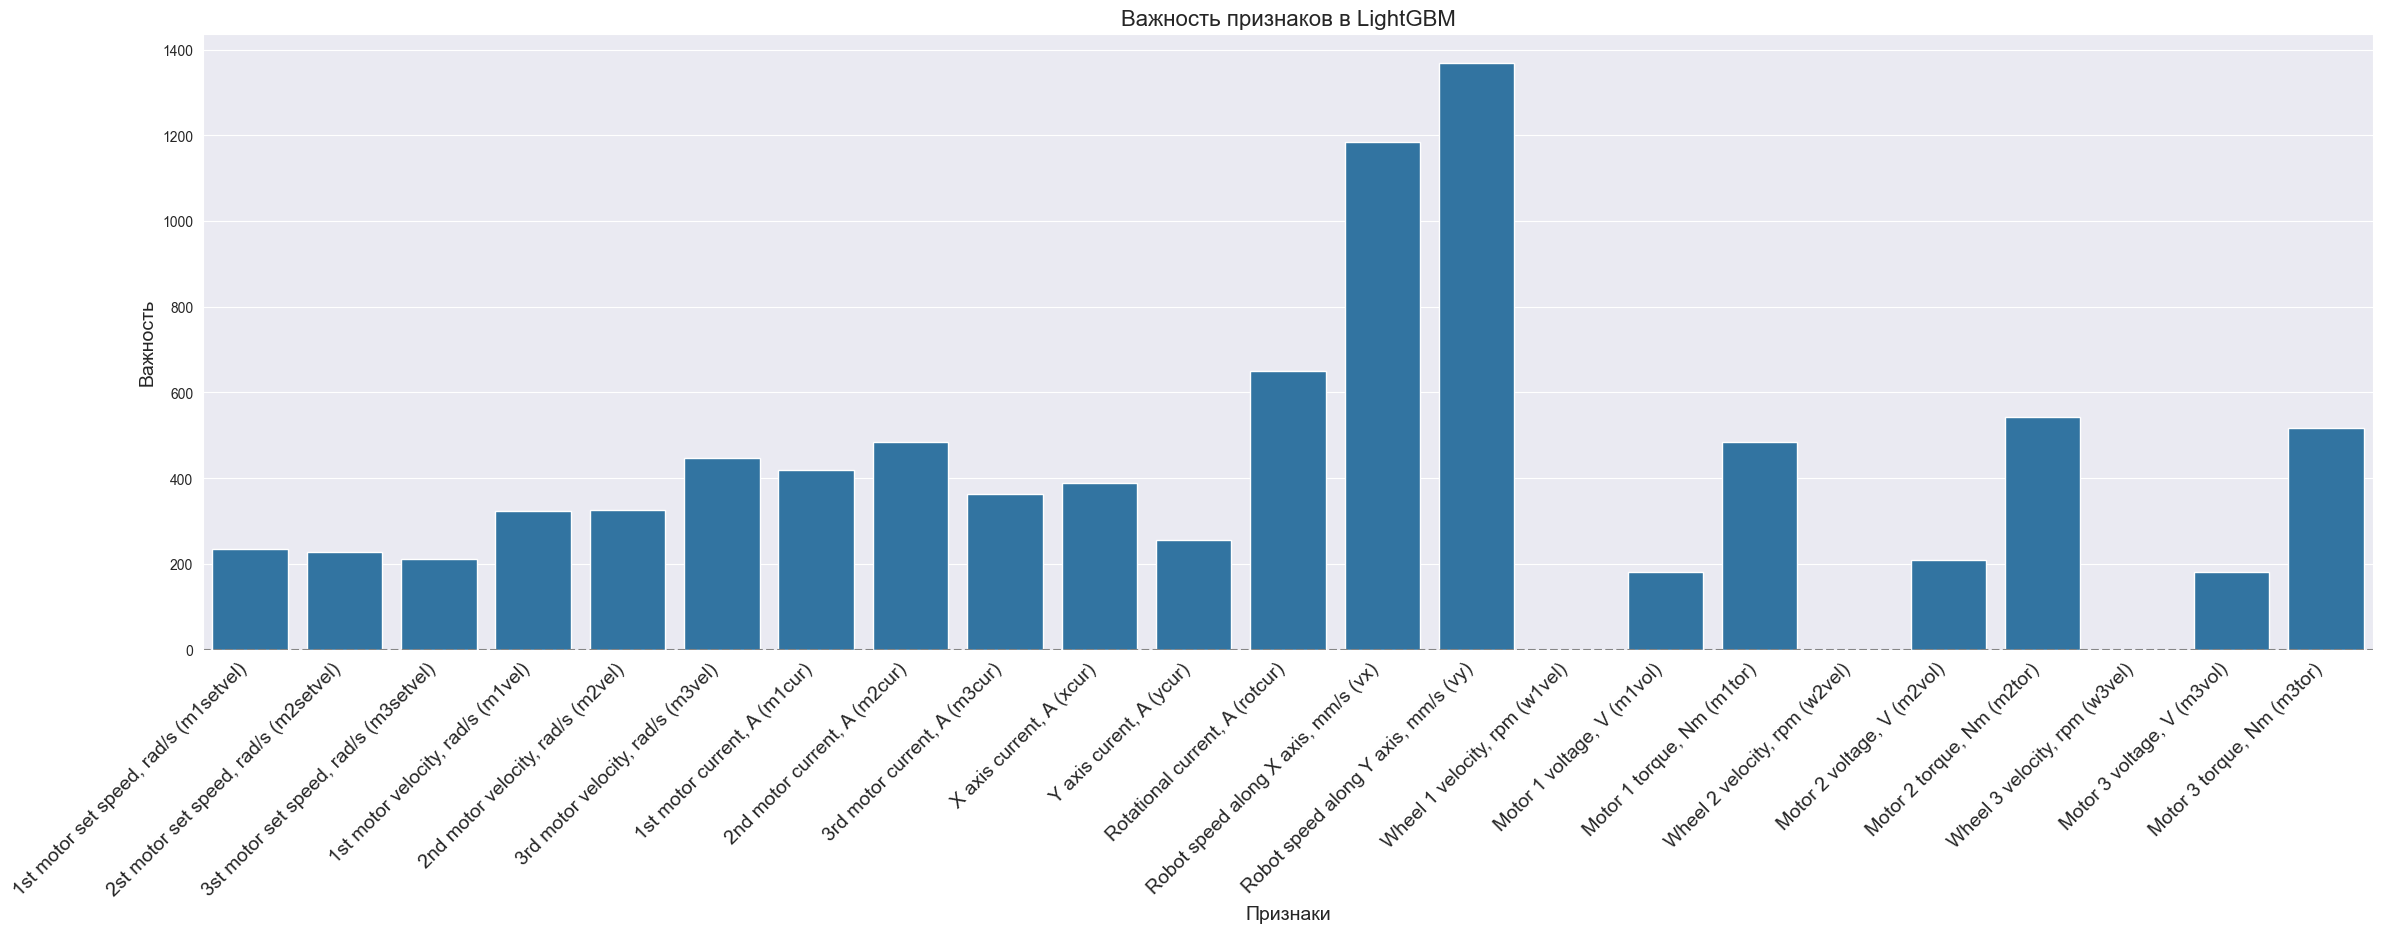

In [235]:
LGBMC_parameters = model_LGBMC.feature_importances_
feature_names = X.columns.tolist()

plt.figure(figsize=(28, 8))
sns.barplot(x=feature_names, y=LGBMC_parameters)

plt.title('Важность признаков в LightGBM', fontsize=16)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Важность', fontsize=14)
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=14
)
plt.axhline(0, color='grey', linestyle='--')
plt.show()

In [236]:
#Нейронка
model_poln = Sequential()
model_poln.add(Dense(len(X.columns), activation='relu', input_shape=(X_train.shape[1],)))
model_poln.add(Dense(len(X.columns)*2, activation='relu'))
model_poln.add(Dense(len(X.columns)*2, activation='relu'))
model_poln.add(Dense(3, activation='softmax'))

model_poln.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_poln.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_val, Y_val))

loss, accuracy_poln_test = model_poln.evaluate(X_test, Y_test)

Epoch 1/50


H:\NeuroBludniak\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2803/2803 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6798 - loss: 0.5971 - val_accuracy: 0.7760 - val_loss: 0.4542
Epoch 2/50
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7922 - loss: 0.4315 - val_accuracy: 0.8013 - val_loss: 0.4123
Epoch 3/50
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8073 - loss: 0.4101 - val_accuracy: 0.7970 - val_loss: 0.4218
Epoch 4/50
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8008 - loss: 0.4151 - val_accuracy: 0.8080 - val_loss: 0.4096
Epoch 5/50
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8118 - loss: 0.3995 - val_accuracy: 0.8113 - val_loss: 0.4003
Epoch 6/50
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8134 - loss: 0.4011 - val_accuracy: 0.8142 - val_loss: 0.3930
Epoch 7/50
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8161 - loss: 0.3912 - val_accuracy: 0.8048 - val_loss: 0.4064
Epoch 8/50
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8179 - loss: 0.3902 - val_accur

In [237]:
weights = model_poln.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(weights), axis=0)
feature_names = X.columns.tolist()

print(len(feature_importances))
print(len(feature_names))       

23
23


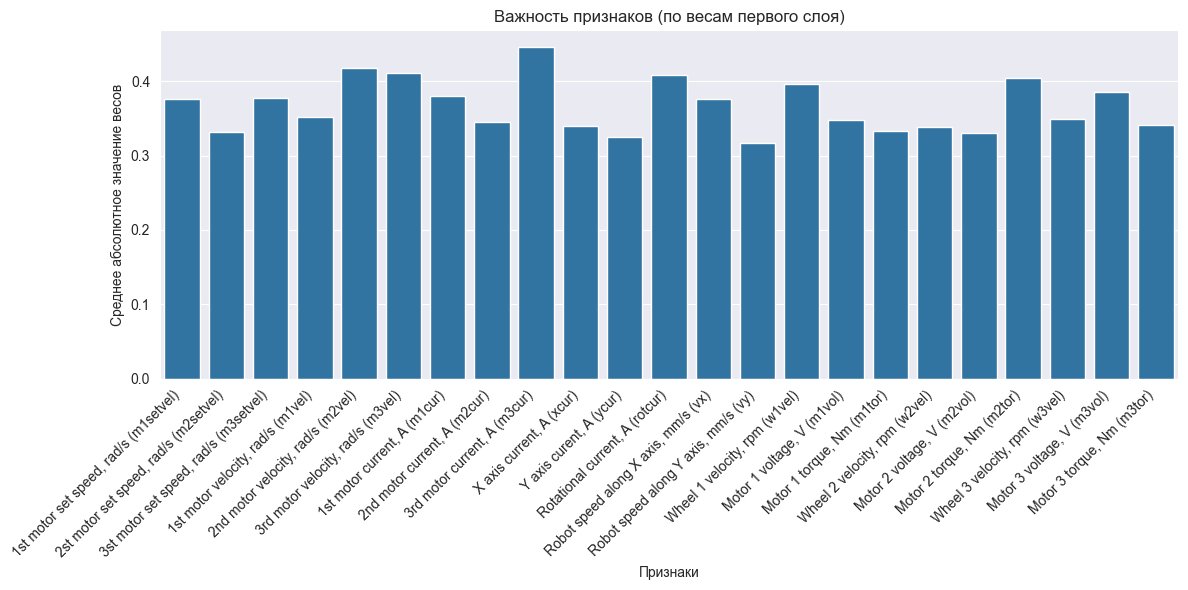

In [238]:
#Влияние признаков по весам первого слоя
weights = model_poln.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(weights), axis=0)

feature_names = X.columns.tolist()

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title('Важность признаков (по весам первого слоя)')
plt.xlabel('Признаки')
plt.ylabel('Среднее абсолютное значение весов')
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.tight_layout()
plt.show()

0.8335183262825012
Тестовая точность: 0.83
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


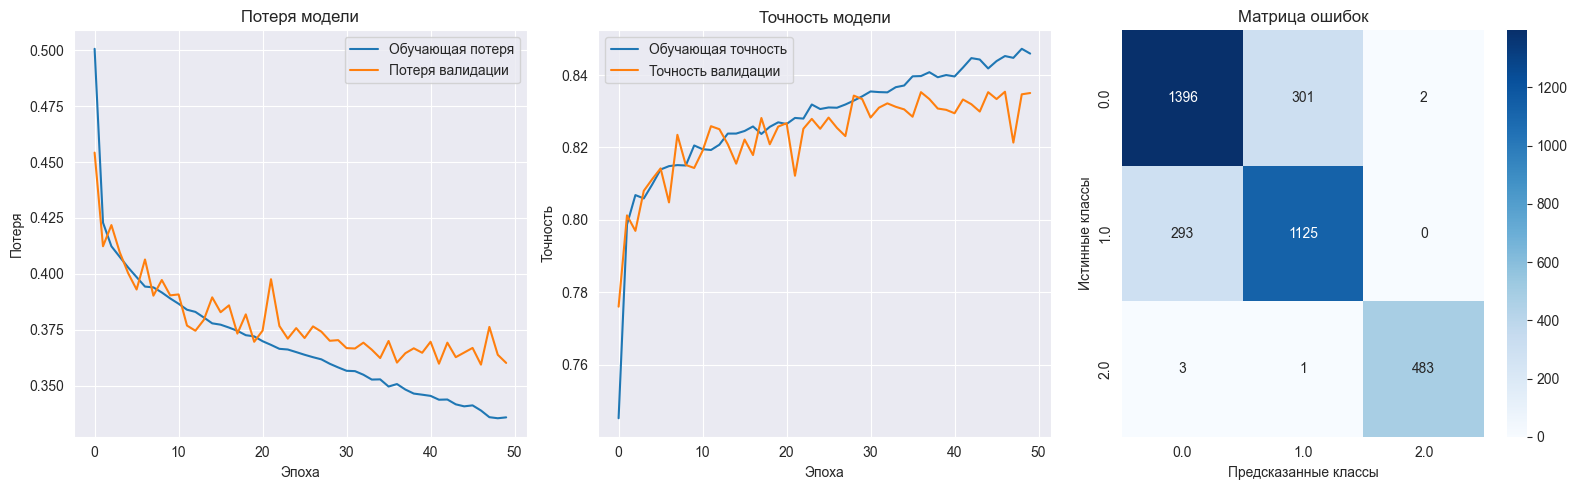

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0      0.825     0.822     0.823      1699
         1.0      0.788     0.793     0.791      1418
         2.0      0.996     0.992     0.994       487

    accuracy                          0.834      3604
   macro avg      0.870     0.869     0.869      3604
weighted avg      0.834     0.834     0.834      3604



In [239]:
print(accuracy_poln_test)
print(f'Тестовая точность: {accuracy_poln_test:.2f}')

# Визуализация потерь и точности (без изменений)
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Обучающая потеря')
plt.plot(history.history['val_loss'], label='Потеря валидации')
plt.title('Потеря модели')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Обучающая точность')
plt.plot(history.history['val_accuracy'], label='Точность валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

#Матрица ошибок
plt.subplot(1, 3, 3)
y_pred = np.argmax(model_poln.predict(X_test), axis=1)
cm = confusion_matrix(Y_test.astype(int), y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')

plt.tight_layout()
plt.show()


# Предсказания на тестовых данных
y_pred_test_pol = np.argmax(model_poln.predict(X_test), axis=1)  # Получаем предсказанные классы

# Выводим отчет о классификации
print(classification_report(Y_test, y_pred_test_pol, digits=3, zero_division=0))

In [240]:
#Логистическая регрессия
from imblearn.over_sampling import SMOTE
from collections import Counter


print("Исходное распределение классов в обучающей выборке:")
print(Counter(Y_train))

# Подсчет количества примеров в каждом классе
class_counts = Y_train.value_counts()
min_class_count = class_counts.min()  # Наименьшее количество примеров в классе
class_counts_test = Y_test.value_counts()
min_class_count_test = class_counts_test.min()

# Создание сбалансированных выборок
X_balanced = pd.DataFrame()
Y_balanced = pd.Series()
X_balanced_test = pd.DataFrame()
Y_balanced_test = pd.Series()

for class_label in class_counts.index:
    # Выбор случайных примеров из каждого класса
    X_class = X_train[Y_train == class_label].sample(min_class_count, random_state=42)
    y_class = Y_train[Y_train == class_label].sample(min_class_count, random_state=42)
    X_class_test = X_test[Y_test == class_label].sample(min_class_count_test, random_state=42)
    y_class_test = Y_test[Y_test == class_label].sample(min_class_count_test, random_state=42)
    # Объединение выборок
    X_balanced = pd.concat([X_balanced, X_class])
    Y_balanced = pd.concat([Y_balanced, y_class])
    X_balanced_test = pd.concat([X_balanced_test, X_class_test])
    Y_balanced_test = pd.concat([Y_balanced_test, y_class_test])

# Проверка нового распределения классов
print("\nНовое распределение классов после подвыборки:")
print(Counter(Y_balanced))
print(Counter(Y_balanced_test))

Исходное распределение классов в обучающей выборке:
Counter({0.0: 13047, 1.0: 10947, 2.0: 4032})

Новое распределение классов после подвыборки:
Counter({0.0: 4032, 1.0: 4032, 2.0: 4032})
Counter({0.0: 487, 1.0: 487, 2.0: 487})


C:\Users\khrip\AppData\Local\Temp\ipykernel_20712\2166354009.py:29: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  Y_balanced = pd.concat([Y_balanced, y_class])
C:\Users\khrip\AppData\Local\Temp\ipykernel_20712\2166354009.py:31: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  Y_balanced_test = pd.concat([Y_balanced_test, y_class_test])


In [241]:
model_regress_up = LogisticRegression()
model_regress_up.fit(X_balanced, Y_balanced)


predictions_test_up = model_regress_up.predict(X_test)
#predictions_val_up = model_regress_up.predict(X_val)
predictions_train_up = model_regress_up.predict(X_balanced)

accuracy_test_up = accuracy_score(Y_test, predictions_test_up)
accuracy_train_up = accuracy_score(Y_balanced, predictions_train_up)
#accuracy_val_up = accuracy_score(Y_val, predictions_val_up)

Accuracy train: 0.73
Accuracy test: 0.65



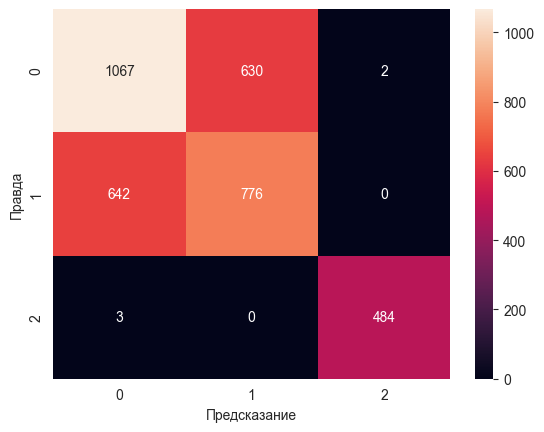

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1699
           1       0.55      0.55      0.55      1418
           2       1.00      0.99      0.99       487

    accuracy                           0.65      3604
   macro avg       0.72      0.72      0.72      3604
weighted avg       0.65      0.65      0.65      3604



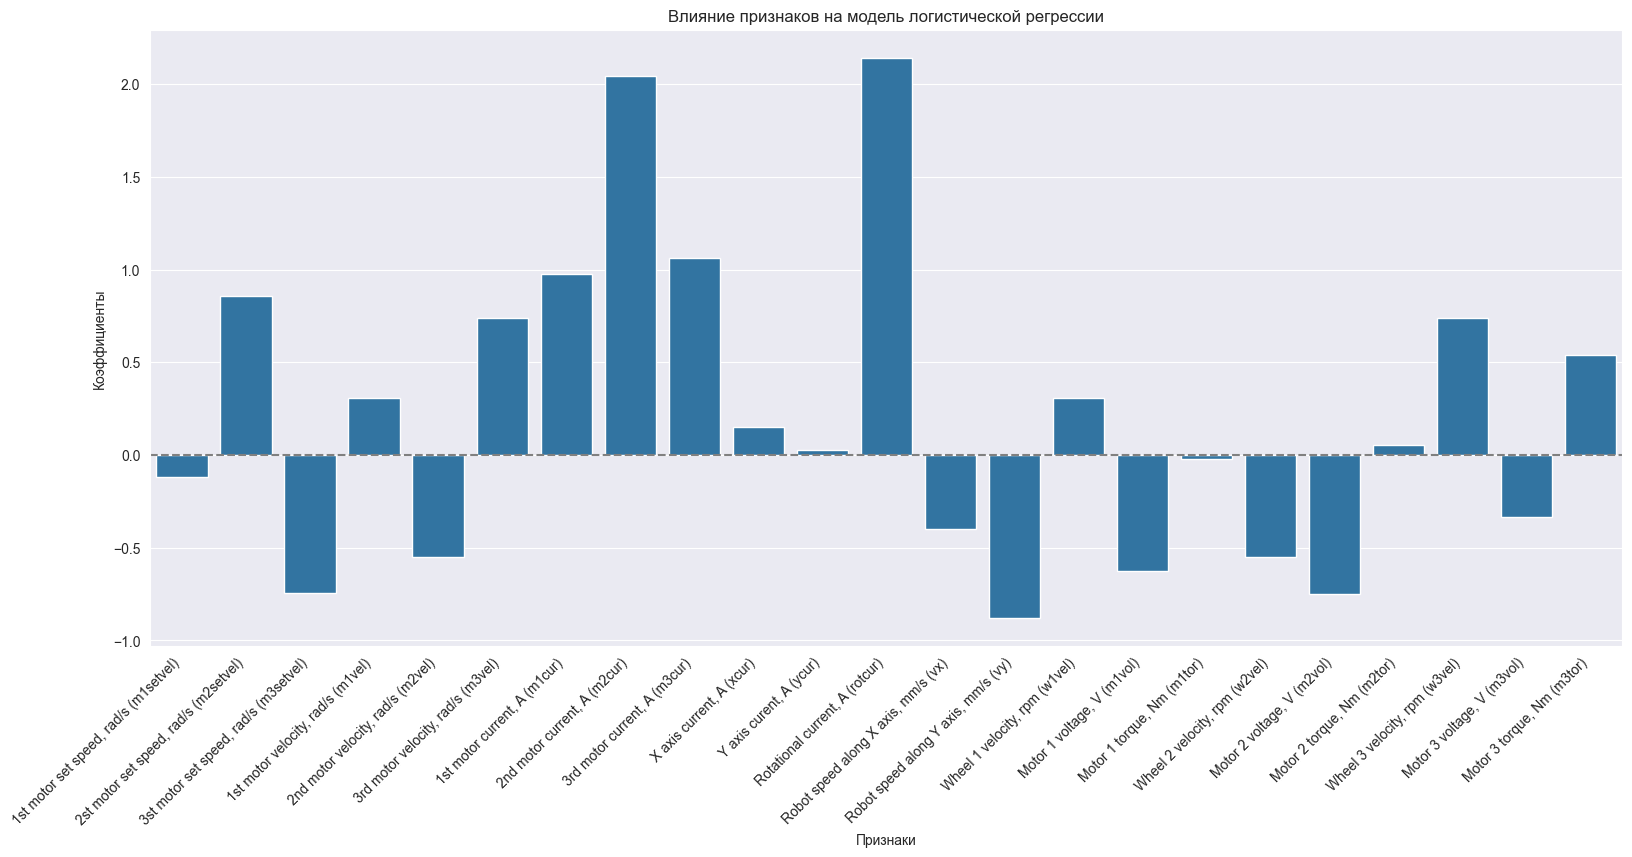

In [242]:
# Вывод результатов
print(f'Accuracy train: {accuracy_train_up:.2f}')
#print(f'Accuracy val: {accuracy_val_up:.2f}')
print(f'Accuracy test: {accuracy_test_up:.2f}')
print('')
cm = confusion_matrix(Y_test, predictions_test_up)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Предсказание')
plt.ylabel('Правда')
plt.show()


# Вывод метрик для каждого класса
print("Classification Report:")
print(classification_report(Y_test, predictions_test_up, target_names=['0', '1', '2']))

coefficients = model_regress_up.coef_[0]
feature_names = X.columns.tolist()

# Создание столбчатой диаграммы
plt.figure(figsize=(19, 8))
sns.barplot(x=feature_names, y=coefficients)
plt.title('Влияние признаков на модель логистической регрессии')
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.axhline(0, color='grey', linestyle='--')  # Линия на уровне 0
plt.show()

In [243]:
print("Исходное распределение классов в обучающей выборке:")
print(Counter(Y_train))
print("Исходное распределение классов в валидационной выборке:")
print(Counter(Y_val))
print("Исходное распределение классов в тестовой выборке:")
print(Counter(Y_test))

Исходное распределение классов в обучающей выборке:
Counter({0.0: 13047, 1.0: 10947, 2.0: 4032})
Исходное распределение классов в валидационной выборке:
Counter({0.0: 3927, 1.0: 3257, 2.0: 1224})
Исходное распределение классов в тестовой выборке:
Counter({0.0: 1699, 1.0: 1418, 2.0: 487})


Лабораторная работа 2

In [244]:
#Подготовка
data = df_com_2
data = data.drop(columns=["surface"])

data.head(3)

1st motor set speed, rad/s (m1setvel)  \
0                              -0.866025   
1                              -0.866025   
2                              -0.866025   

   2st motor set speed, rad/s (m2setvel)  \
0                                    0.0   
1                                    0.0   
2                                    0.0   

   3st motor set speed, rad/s (m3setvel)  1st motor velocity, rad/s (m1vel)  \
0                               0.866025                          -0.600000   
1                               0.866025                          -0.666666   
2                               0.866025                          -0.600000   

   2nd motor velocity, rad/s (m2vel)  3rd motor velocity, rad/s (m3vel)  \
0                          -0.066667                           0.600000   
1                           0.066667                           0.533334   
2                          -0.066667                           0.600000   

   1st motor current, A (m1cur)  2nd motor current, A (m2cur)  \
0                      0.113929                     -0.973684   
1                     -0.265822                     -1.000000   
2                      0.113929                     -0.973684   

   3rd motor current, A (m3cur)  X axis current, A (xcur)  ...  \
0                      0.054052                  0.638376  ...   
1                      0.432425                  0.630998  ...   
2                      0.054052                  0.638376  ...   

   Robot speed along Y axis, mm/s (vy)  Wheel 1 velocity, rpm (w1vel)  \
0                             0.184299                      -0.600000   
1                             0.184299                      -0.666666   
2                             0.184299                      -0.600000   

   Motor 1 voltage, V (m1vol)  Motor 1 torque, Nm (m1tor)  \
0                   -0.640527                   -0.217425   
1                   -0.478776                   -0.123631   
2                   -0.640527                   -0.217425   

   Wheel 2 velocity, rpm (w2vel)  Motor 2 voltage, V (m2vol)  \
0                      -0.066667                   -0.025802   
1                       0.066667                    0.011508   
2                      -0.066667                   -0.025802   

   Motor 2 torque, Nm (m2tor)  Wheel 3 velocity, rpm (w3vel)  \
0                   -0.082408                       0.600000   
1                   -0.080925                       0.533334   
2                   -0.082408                       0.600000   

   Motor 3 voltage, V (m3vol)  Motor 3 torque, Nm (m3tor)  
0                    0.598601                    0.179812  
1                    0.755960                    0.323297  
2                    0.598601                    0.179812  

[3 rows x 23 columns]

In [245]:
X2 = data.drop(columns=["Robot speed along X axis, mm/s (vx)"])
Y2 = data["Robot speed along X axis, mm/s (vx)"]

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2_scaled, Y2, test_size=0.2, random_state=42)

In [246]:
#Линейная регрессия
# Обучение модели
model = LinearRegression()
model.fit(X_train2, Y_train2)

# Проверка одной случайной строки
random_index = np.random.randint(0, len(X_test2))
original_row = X_test2[random_index]  # Для numpy массива используем обычную индексацию
print("Оригинальная строка:", original_row)

X_test_row = original_row.reshape(1, -1)  # Преобразуем в 2D numpy-массив
predicted_param = model.predict(X_test_row)[0]   # Предсказание

actual_param = Y_test2.iloc[random_index]        # Фактическое значение (предполагаем, что Y_test2 это pandas Series)
abs_difference = abs(predicted_param - actual_param)

print("Предсказанный параметр:", predicted_param)
print("Фактический параметр:", actual_param)
print("Модуль разности:", abs_difference)

# Расчёт точности (если actual_param != 0)
if actual_param != 0:
    accuracy = (1 - abs_difference / abs(actual_param)) * 100
    print("Точность предсказания: {:.2f}%".format(accuracy))
else:
    print("Точность не может быть рассчитана (деление на ноль)")

# Проверка нескольких предсказаний
print("\nПроверка нескольких предсказаний:")
for i in range(5):
    index = np.random.randint(0, len(X_test2))
    test_row = X_test2[index].reshape(1, -1)  # Для numpy массива
    predicted_param = model.predict(test_row)[0]
    actual_param = Y_test2.iloc[index]  # Предполагаем, что Y_test2 это pandas Series
    abs_difference = abs (predicted_param - actual_param)
    if actual_param != 0:
        accuracy = (1 - abs_difference / abs(actual_param)) * 100
        print(f"Индекс: {index} | Предсказанный: {predicted_param:.4f} | Фактический: {actual_param} | Разность: {abs_difference:.4f} | Точность: {accuracy:.2f}%")
    else:
        print(f"Индекс: {index} | Предсказанный: {predicted_param:.4f} | Фактический: {actual_param} | Разность: {abs_difference:.4f} | Точность: N/A (деление на ноль)")


Оригинальная строка: [ 1.2837725  -0.14908011 -1.22451697  1.1862044  -0.1548344  -1.0009831
  0.7416882  -1.39925668  1.64316068 -1.66282259  0.04121176  0.65585385
  0.50261265  1.1862044   1.27418817  1.03544538 -0.1548344  -0.23781661
 -0.29475184 -1.0009831  -1.58811749 -2.09977363]
Предсказанный параметр: -0.45248978918306065
Фактический параметр: -0.4139087337767193
Модуль разности: 0.03858105540634138
Точность предсказания: 90.68%

Проверка нескольких предсказаний:
Индекс: 1877 | Предсказанный: -0.2927 | Фактический: -0.2585199032198917 | Разность: 0.0342 | Точность: 86.77%
Индекс: 7256 | Предсказанный: 0.3253 | Фактический: 0.15047325419411323 | Разность: 0.1748 | Точность: -16.15%
Индекс: 1026 | Предсказанный: 0.3813 | Фактический: 0.6166998838864212 | Разность: 0.2354 | Точность: 61.84%
Индекс: 4631 | Предсказанный: 0.4065 | Фактический: 0.7301914327979863 | Разность: 0.3237 | Точность: 55.67%
Индекс: 600 | Предсказанный: -0.4159 | Фактический: -0.6503989005462247 | Разность

In [247]:
#Предсказание тока вращения (Логистическая регрессия)
data = df_com_2

data = data.drop(columns=["surface"])

parametr = "Rotational current, A (rotcur)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

data = data.drop(index=random_indices)

X_train = data.drop(columns=[parametr])
y_train = data[parametr]

model = LinearRegression()
model.fit(X_train, y_train)

predicted_params = model.predict(X_test_rows)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / abs(actual_param)) * 100
    if accuracy > 100:
        accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

Тестовая строка 1:
Предсказанный параметр: -0.14634277857775724
Фактический параметр: -0.14634247263346534
Разность между предсказанным и фактическим значением: -3.0594429190067274e-07
Точность предсказания: 100.00%
Процентное соотношение предсказанного к фактическому: 100.00%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 2:
Предсказанный параметр: 0.024389003788827357
Фактический параметр: 0.024388747474516803
Разность между предсказанным и фактическим значением: 2.5631431055384013e-07
Точность предсказания: 100.00%
Процентное соотношение предсказанного к фактическому: 100.00%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: 0.31707055448881233
Фактический параметр: 0.3170708390882009
Разность между предсказанным и фактическим значением: -2.8459938855585065e-07
Точ

In [248]:
#Предсказание скорости (Линейная регрессия)
data = df_com_2

data = data.drop(columns=["surface"])

parametr = "Robot speed along X axis, mm/s (vx)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

data = data.drop(index=random_indices)

X_train = data.drop(columns=[parametr])
y_train = data[parametr]

model = LinearRegression()
model.fit(X_train, y_train)

predicted_params = model.predict(X_test_rows)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / abs(actual_param)) * 100
    if accuracy > 100:
        accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

Тестовая строка 1:
Предсказанный параметр: 0.5126234302888406
Фактический параметр: 0.6206752694817417
Разность между предсказанным и фактическим значением: -0.10805183919290107
Точность предсказания: 82.59%
Процентное соотношение предсказанного к фактическому: 82.59%
Средняя абсолютная ошибка (MAE): 0.11
Средняя квадратичная ошибка (MSE): 0.01
Корень из средней квадратичной ошибки (RMSE): 0.11

Тестовая строка 2:
Предсказанный параметр: -0.4323999657091804
Фактический параметр: -0.32748735375126936
Разность между предсказанным и фактическим значением: -0.10491261195791102
Точность предсказания: 67.96%
Процентное соотношение предсказанного к фактическому: 132.04%
Средняя абсолютная ошибка (MAE): 0.10
Средняя квадратичная ошибка (MSE): 0.01
Корень из средней квадратичной ошибки (RMSE): 0.10

Тестовая строка 3:
Предсказанный параметр: -0.43970278622992964
Фактический параметр: -0.6107920445261612
Разность между предсказанным и фактическим значением: 0.17108925829623156
Точность предсказа

In [249]:
#Предсказание напряжения на двигателе 2 (Линейная регрессия)
data = df_com_2

data = data.drop(columns=["surface"])

parametr = "Motor 2 voltage, V (m2vol)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

data = data.drop(index=random_indices)

X_train = data.drop(columns=[parametr])
y_train = data[parametr]

model = LinearRegression()
model.fit(X_train, y_train)

predicted_params = model.predict(X_test_rows)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / abs(actual_param)) * 100
    if accuracy > 100:
        accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

Тестовая строка 1:
Предсказанный параметр: -0.14773763206458457
Фактический параметр: -0.14773731843182525
Разность между предсказанным и фактическим значением: -3.136327593189492e-07
Точность предсказания: 100.00%
Процентное соотношение предсказанного к фактическому: 100.00%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 2:
Предсказанный параметр: -0.3304261394402157
Фактический параметр: -0.3304263864323298
Разность между предсказанным и фактическим значением: 2.4699211409462407e-07
Точность предсказания: 100.00%
Процентное соотношение предсказанного к фактическому: 100.00%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: -0.22107036041241548
Фактический параметр: -0.22107018398991418
Разность между предсказанным и фактическим значением: -1.7642250130234238e-07
Точ

Дерево

Тестовая строка 1:
Предсказанный параметр: -0.13414738548289518
Фактический параметр: -0.14634247263346534
Разность между предсказанным и фактическим значением: 0.01219508715057016
Точность предсказания: 91.67%
Процентное соотношение предсказанного к фактическому: 91.67%
Средняя абсолютная ошибка (MAE): 0.01
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.01

Тестовая строка 2:
Предсказанный параметр: 0.0609740089262274
Фактический параметр: 0.024388747474516803
Разность между предсказанным и фактическим значением: 0.03658526145171059
Точность предсказания: -50.01%
Процентное соотношение предсказанного к фактическому: 250.01%
Средняя абсолютная ошибка (MAE): 0.04
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.04

Тестовая строка 3:
Предсказанный параметр: 0.29268066478706034
Фактический параметр: 0.3170708390882009
Разность между предсказанным и фактическим значением: -0.024390174301140544
Точность предска

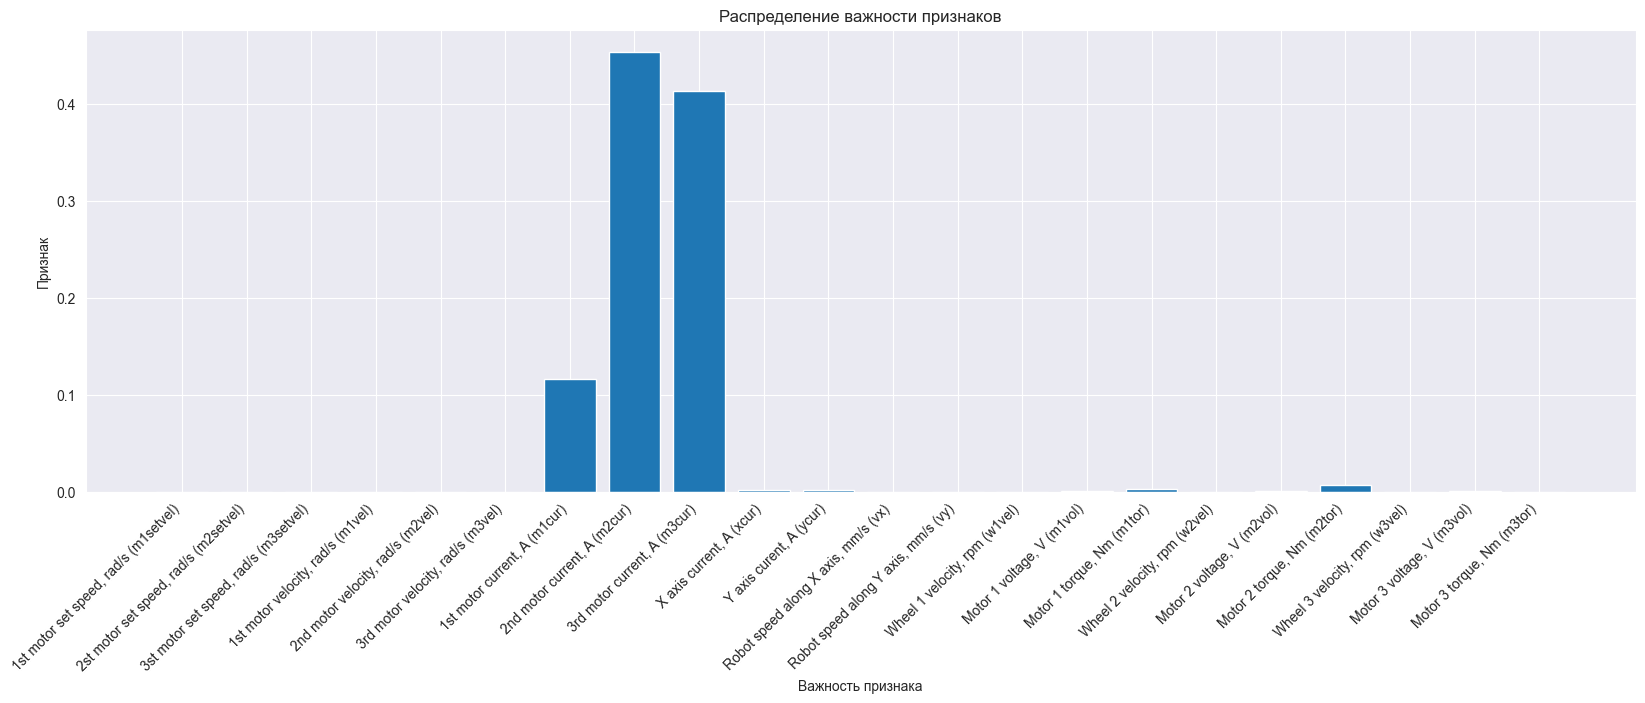

In [250]:
#Предсказание тока вращения (Дерево)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

data = df_com_2
data = data.drop(columns=["surface"])
#Целевой параметр
parametr = "Rotational current, A (rotcur)"
X = data.drop(columns=[parametr])
y = data[parametr]
seed = 42
np.random.seed(seed)
#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]
data = data.drop(index=random_indices)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))
X_train, y_train = X_scaled, data[parametr]
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

X_test_rows_scaled = scaler.transform(X_test_rows)

predicted_params = model.predict(X_test_rows_scaled)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

feature_importances = model.feature_importances_
feature_names = X.columns # Имена признаков

plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances) # Выводим горизонтальную диаграмму
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.show()

Тестовая строка 1:
Предсказанный параметр: 0.29614489720306264
Фактический параметр: 0.6206752694817417
Разность между предсказанным и фактическим значением: -0.32453037227867904
Точность предсказания: 47.71%
Процентное соотношение предсказанного к фактическому: 47.71%
Средняя абсолютная ошибка (MAE): 0.32
Средняя квадратичная ошибка (MSE): 0.11
Корень из средней квадратичной ошибки (RMSE): 0.32

Тестовая строка 2:
Предсказанный параметр: -0.3255567449270195
Фактический параметр: -0.32748735375126936
Разность между предсказанным и фактическим значением: 0.0019306088242498354
Точность предсказания: 99.41%
Процентное соотношение предсказанного к фактическому: 99.41%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: -0.6290900556419873
Фактический параметр: -0.6107920445261612
Разность между предсказанным и фактическим значением: -0.018298011115826074
Точность предска

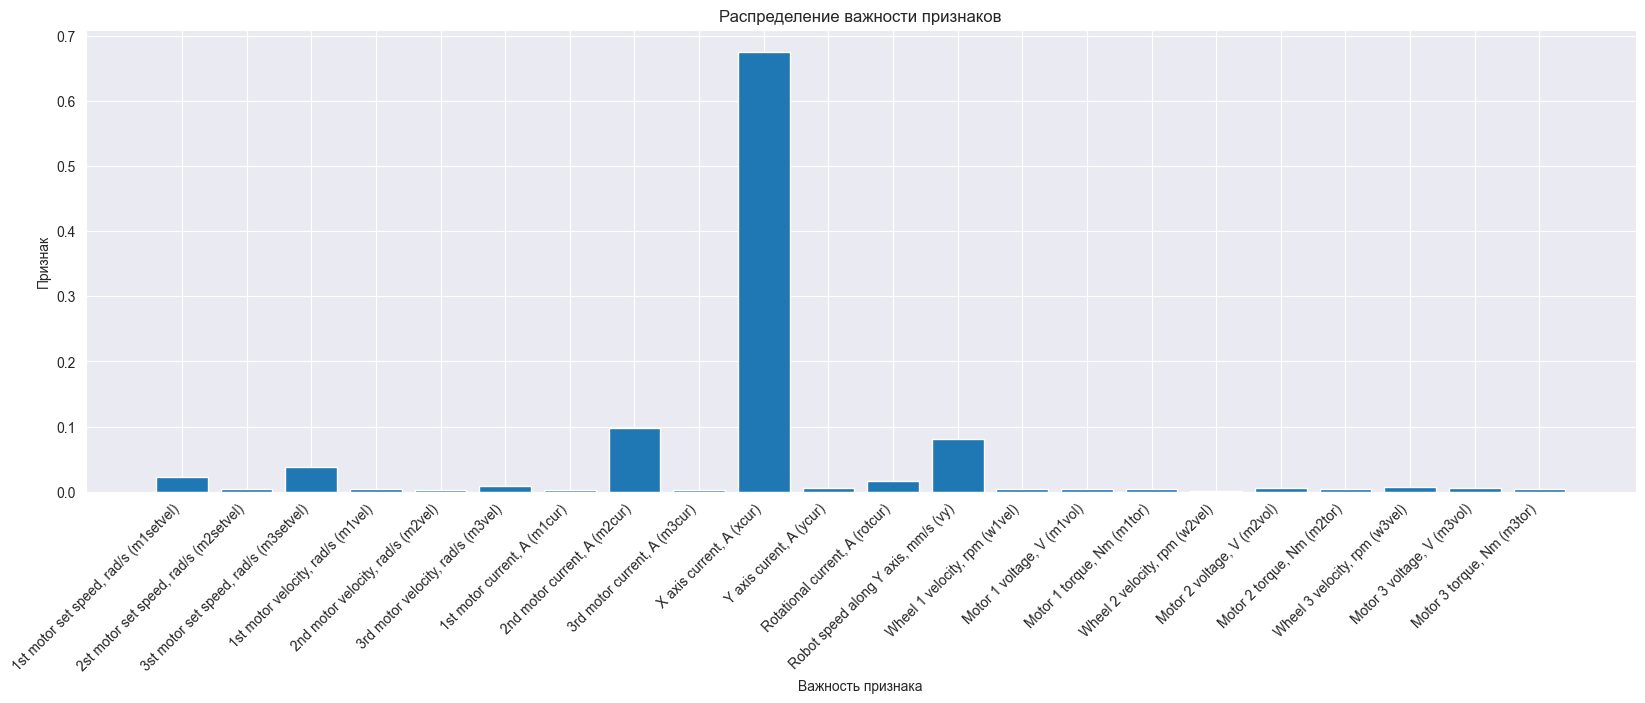

In [251]:
#Предсказание скорости (Дерево)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

data = df_com_2

data = data.drop(columns=["surface"])

#Целевой параметр
parametr = "Robot speed along X axis, mm/s (vx)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]
data = data.drop(index=random_indices)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))
X_train, y_train = X_scaled, data[parametr]
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
X_test_rows_scaled = scaler.transform(X_test_rows)
predicted_params = model.predict(X_test_rows_scaled)
for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None
    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)
    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))
    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])
    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)
    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")
r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))
feature_importances = model.feature_importances_
feature_names = X.columns # Имена признаков
plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances) # Выводим горизонтальную диаграмму
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.show()

Тестовая строка 1:
Предсказанный параметр: -0.14773731843182522
Фактический параметр: -0.14773731843182525
Разность между предсказанным и фактическим значением: 2.7755575615628914e-17
Точность предсказания: 100.00%
Процентное соотношение предсказанного к фактическому: 100.00%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 2:
Предсказанный параметр: -0.3304263864323298
Фактический параметр: -0.3304263864323298
Разность между предсказанным и фактическим значением: 0.0
Точность предсказания: 100.00%
Процентное соотношение предсказанного к фактическому: 100.00%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: -0.2210701839899141
Фактический параметр: -0.22107018398991418
Разность между предсказанным и фактическим значением: 8.326672684688674e-17
Точность предсказания: 10

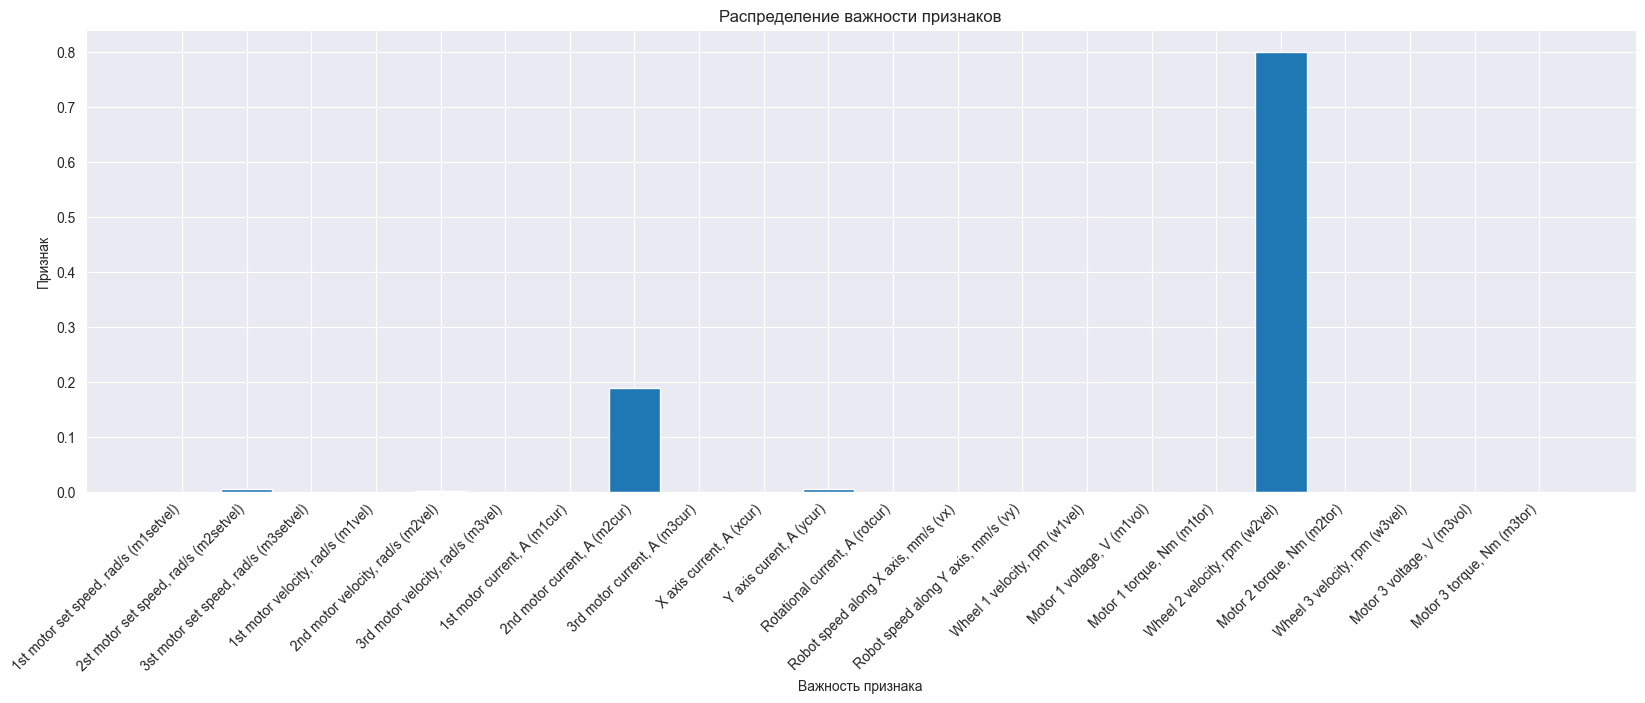

In [252]:
#Предсказание напряжения на двигателе 2 (Дерево)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
data = df_com_2
data = data.drop(columns=["surface"])
#Целевой параметр
parametr = "Motor 2 voltage, V (m2vol)"
X = data.drop(columns=[parametr])
y = data[parametr]
seed = 42
np.random.seed(seed)
#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]
data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))
X_train, y_train = X_scaled, data[parametr]
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
X_test_rows_scaled = scaler.transform(X_test_rows)
predicted_params = model.predict(X_test_rows_scaled)
for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None
    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)
    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))
    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))
feature_importances = model.feature_importances_
feature_names = X.columns # Имена признаков

plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances) # Выводим горизонтальную диаграмму
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.show()

Случайный лес

Тестовая строка 1:
Предсказанный параметр: -0.16691516719295454
Фактический параметр: -0.14634247263346534
Разность между предсказанным и фактическим значением: -0.020572694559489207
Точность предсказания: 85.94%
Процентное соотношение предсказанного к фактическому: 114.06%
Средняя абсолютная ошибка (MAE): 0.02
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.02

Тестовая строка 2:
Предсказанный параметр: 0.03188590081405636
Фактический параметр: 0.024388747474516803
Разность между предсказанным и фактическим значением: 0.007497153339539556
Точность предсказания: 69.26%
Процентное соотношение предсказанного к фактическому: 130.74%
Средняя абсолютная ошибка (MAE): 0.01
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.01

Тестовая строка 3:
Предсказанный параметр: 0.29791009193800855
Фактический параметр: 0.3170708390882009
Разность между предсказанным и фактическим значением: -0.019160747150192337
Точность пре

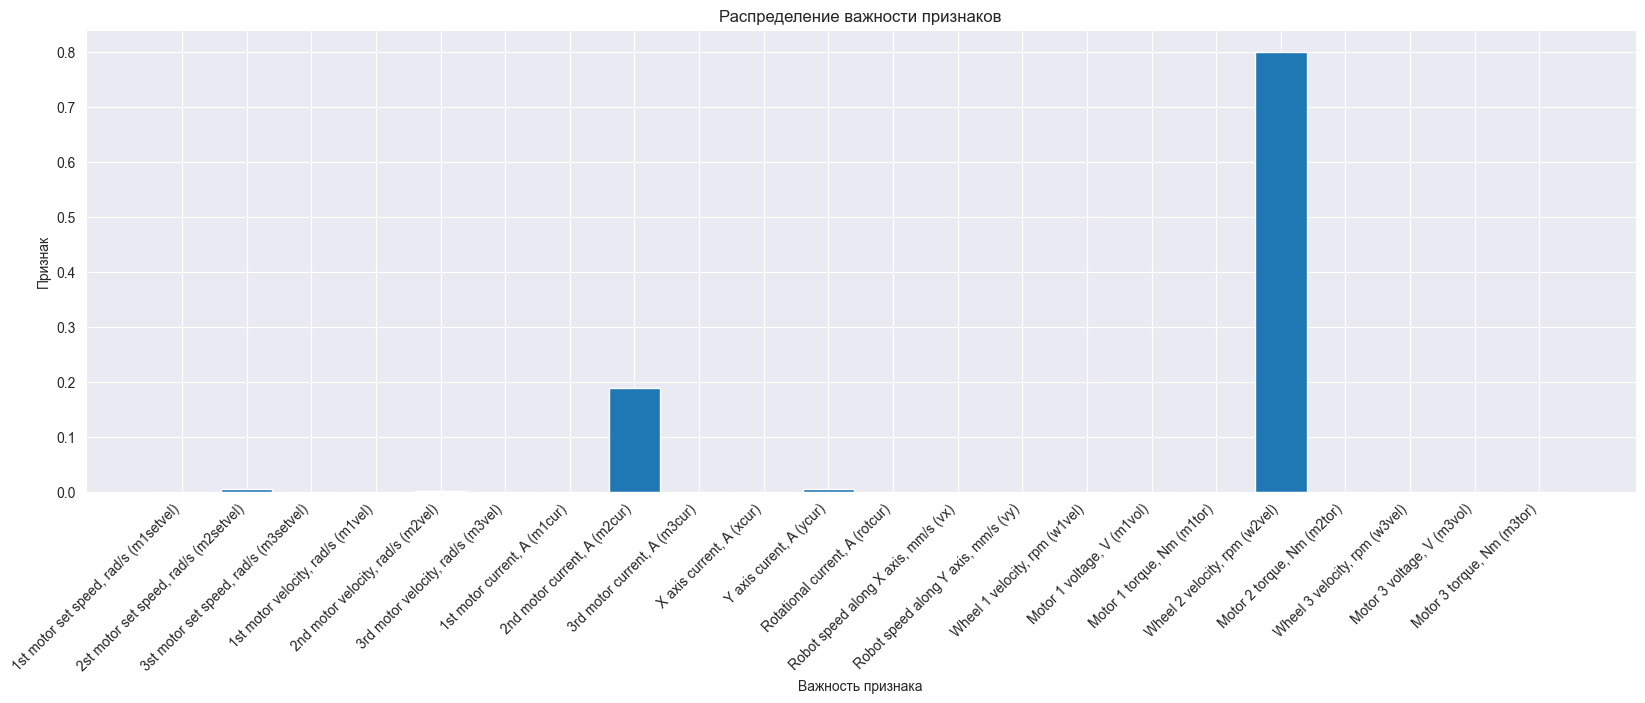

In [253]:
#Предсказание тока вращения (Случайный лес)
from sklearn.ensemble import RandomForestRegressor

data = df_com_2

data = data.drop(columns=["surface"])

#Целевой параметр
parametr = "Rotational current, A (rotcur)"
X = data.drop(columns=[parametr])
y = data[parametr]
seed = 42
np.random.seed(seed)
#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]
data = data.drop(index=random_indices)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))
X_train, y_train = X_scaled, data[parametr]
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
X_test_rows_scaled = scaler.transform(X_test_rows)
predicted_params = model.predict(X_test_rows_scaled)
for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None
    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)
    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))
    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])
    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)
    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")
r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))
plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances) # Выводим горизонтальную диаграмму
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.show()

Тестовая строка 1:
Предсказанный параметр: 0.4283943054115362
Фактический параметр: 0.6206752694817417
Разность между предсказанным и фактическим значением: -0.19228096407020545
Точность предсказания: 69.02%
Процентное соотношение предсказанного к фактическому: 69.02%
Средняя абсолютная ошибка (MAE): 0.19
Средняя квадратичная ошибка (MSE): 0.04
Корень из средней квадратичной ошибки (RMSE): 0.19

Тестовая строка 2:
Предсказанный параметр: -0.3591364976287491
Фактический параметр: -0.32748735375126936
Разность между предсказанным и фактическим значением: -0.031649143877479746
Точность предсказания: 90.34%
Процентное соотношение предсказанного к фактическому: 109.66%
Средняя абсолютная ошибка (MAE): 0.03
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.03

Тестовая строка 3:
Предсказанный параметр: -0.5837785277839244
Фактический параметр: -0.6107920445261612
Разность между предсказанным и фактическим значением: 0.027013516742236843
Точность предсказ

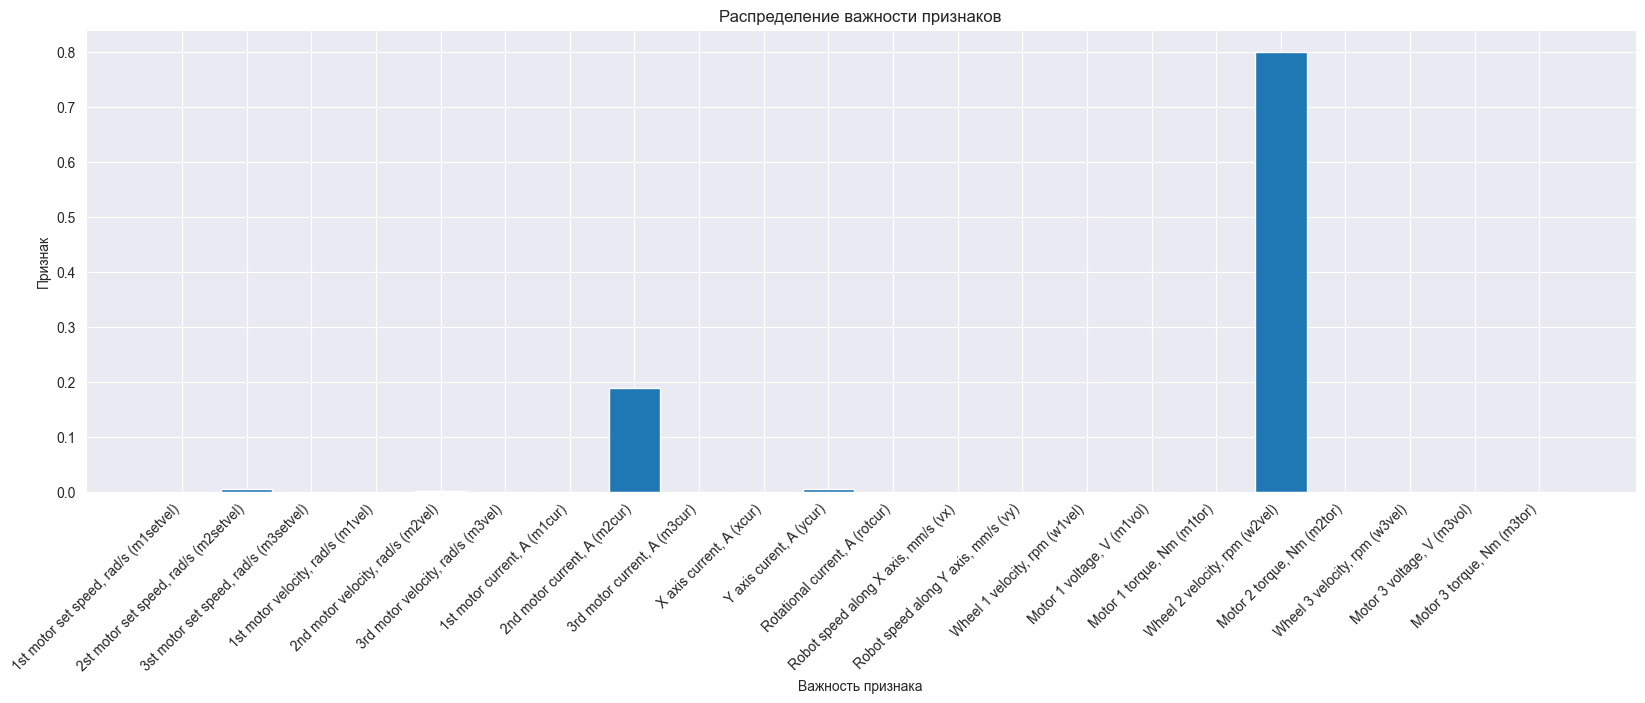

In [254]:
#Предсказание скорости (Случайный лес)
from sklearn.ensemble import RandomForestRegressor

data = df_com_2

data = data.drop(columns=["surface"])

#Целевой параметр
parametr = "Robot speed along X axis, mm/s (vx)"
X = data.drop(columns=[parametr])
y = data[parametr]
seed = 42
np.random.seed(seed)
#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]
data = data.drop(index=random_indices)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))
X_train, y_train = X_scaled, data[parametr]
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
X_test_rows_scaled = scaler.transform(X_test_rows)
predicted_params = model.predict(X_test_rows_scaled)
for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None
    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)
    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))
    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])
    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)
    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")
r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances) # Выводим горизонтальную диаграмму
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.show()

Тестовая строка 1:
Предсказанный параметр: -0.14804740887729706
Фактический параметр: -0.14773731843182525
Разность между предсказанным и фактическим значением: -0.0003100904454718112
Точность предсказания: 99.79%
Процентное соотношение предсказанного к фактическому: 100.21%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 2:
Предсказанный параметр: -0.3301292313080363
Фактический параметр: -0.3304263864323298
Разность между предсказанным и фактическим значением: 0.0002971551242935133
Точность предсказания: 99.91%
Процентное соотношение предсказанного к фактическому: 99.91%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: -0.2209065127920502
Фактический параметр: -0.22107018398991418
Разность между предсказанным и фактическим значением: 0.00016367119786397932
Точность 

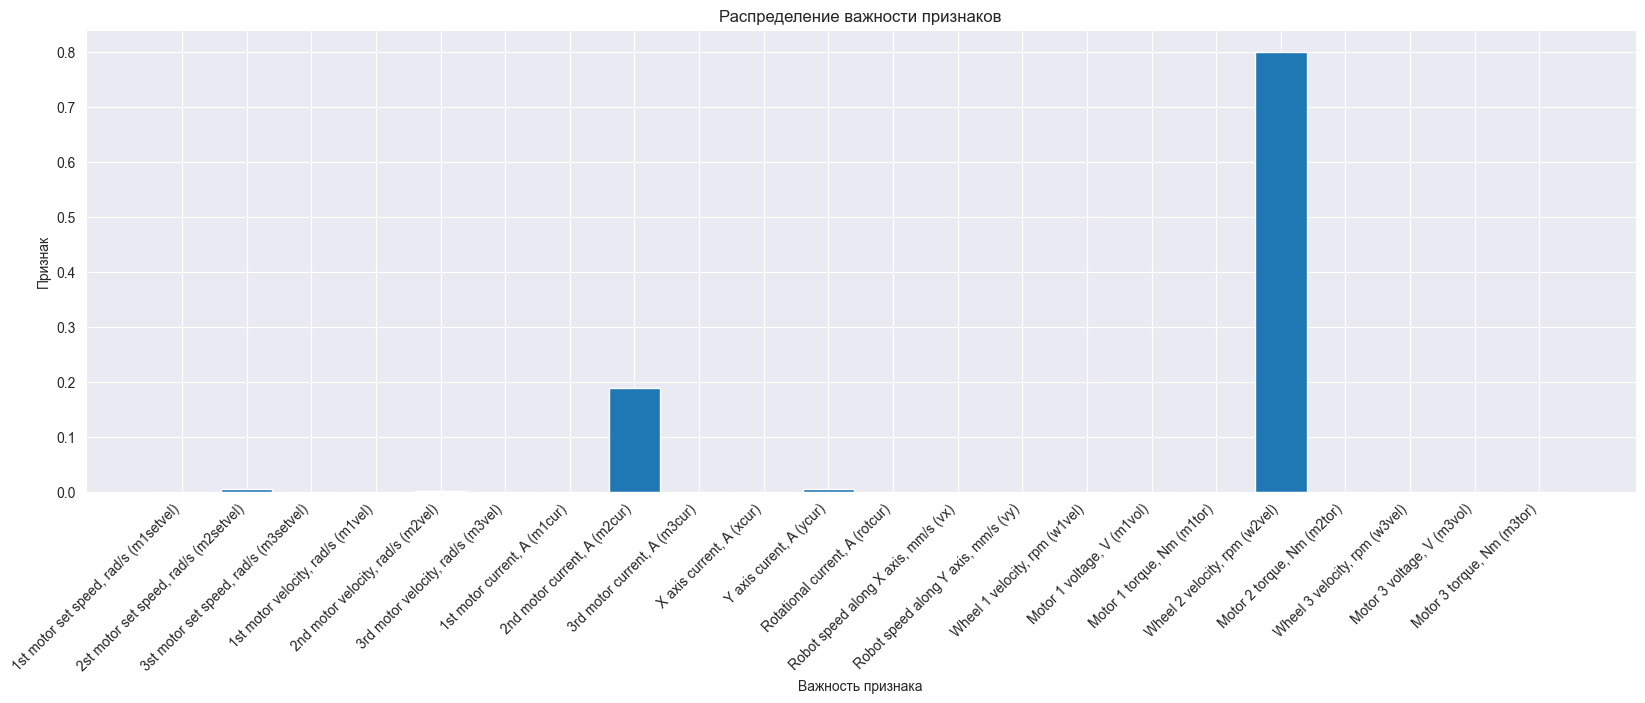

In [255]:
#Предсказание напряжения на двигателе 2 (Случайный лес)
from sklearn.ensemble import RandomForestRegressor
data = df_com_2
data = data.drop(columns=["surface"])
#Целевой параметр
parametr = "Motor 2 voltage, V (m2vol)"
X = data.drop(columns=[parametr])
y = data[parametr]
seed = 42
np.random.seed(seed)
#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]
data = data.drop(index=random_indices)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))
X_train, y_train = X_scaled, data[parametr]
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
X_test_rows_scaled = scaler.transform(X_test_rows)
predicted_params = model.predict(X_test_rows_scaled)
for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None
    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)
    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))
    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])
    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)
    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")
r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))
plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances) # Выводим горизонтальную диаграмму
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.show()

CAT BOOST

In [256]:
#Предсказание тока вращения (CAT BOOST)
from catboost import CatBoostRegressor


data = df_com_2

data = data.drop(columns=["surface"])

#Целевой параметр
parametr = "Rotational current, A (rotcur)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))

X_train, y_train = X_scaled, data[parametr]
model = CatBoostRegressor()
model.fit(X_train, y_train)

X_test_rows_scaled = scaler.transform(X_test_rows)

predicted_params = model.predict(X_test_rows_scaled)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

Learning rate set to 0.073344
0:	learn: 0.2924267	total: 11.8ms	remaining: 11.8s
1:	learn: 0.2737805	total: 21ms	remaining: 10.5s
2:	learn: 0.2565680	total: 29.7ms	remaining: 9.88s
3:	learn: 0.2406011	total: 38.9ms	remaining: 9.69s
4:	learn: 0.2261199	total: 48.1ms	remaining: 9.56s
5:	learn: 0.2129415	total: 56.2ms	remaining: 9.3s
6:	learn: 0.2001204	total: 64.9ms	remaining: 9.21s
7:	learn: 0.1885165	total: 75.3ms	remaining: 9.34s
8:	learn: 0.1776460	total: 83.5ms	remaining: 9.19s
9:	learn: 0.1674135	total: 93.1ms	remaining: 9.22s
10:	learn: 0.1583995	total: 102ms	remaining: 9.14s
11:	learn: 0.1498376	total: 110ms	remaining: 9.08s
12:	learn: 0.1417161	total: 119ms	remaining: 9.05s
13:	learn: 0.1342735	total: 128ms	remaining: 9.04s
14:	learn: 0.1271691	total: 137ms	remaining: 8.98s
15:	learn: 0.1203355	total: 145ms	remaining: 8.91s
16:	learn: 0.1143927	total: 155ms	remaining: 8.99s
17:	learn: 0.1089304	total: 164ms	remaining: 8.94s
18:	learn: 0.1032613	total: 172ms	remaining: 8.89s
19:	

In [257]:
#Предсказание скорости (CAT BOOST)
from catboost import CatBoostRegressor


data = df_com_2

data = data.drop(columns=["surface"])

#Целевой параметр
parametr = "Robot speed along X axis, mm/s (vx)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))

X_train, y_train = X_scaled, data[parametr]
model = CatBoostRegressor()
model.fit(X_train, y_train)

X_test_rows_scaled = scaler.transform(X_test_rows)

predicted_params = model.predict(X_test_rows_scaled)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

Learning rate set to 0.073344
0:	learn: 0.3580039	total: 10.7ms	remaining: 10.7s
1:	learn: 0.3373597	total: 27ms	remaining: 13.5s
2:	learn: 0.3184878	total: 43.9ms	remaining: 14.6s
3:	learn: 0.3014682	total: 51ms	remaining: 12.7s
4:	learn: 0.2858525	total: 58.8ms	remaining: 11.7s
5:	learn: 0.2718016	total: 67.5ms	remaining: 11.2s
6:	learn: 0.2590100	total: 76.1ms	remaining: 10.8s
7:	learn: 0.2474034	total: 83.2ms	remaining: 10.3s
8:	learn: 0.2370648	total: 91.5ms	remaining: 10.1s
9:	learn: 0.2274409	total: 98.3ms	remaining: 9.73s
10:	learn: 0.2189372	total: 106ms	remaining: 9.54s
11:	learn: 0.2111957	total: 113ms	remaining: 9.31s
12:	learn: 0.2044024	total: 120ms	remaining: 9.14s
13:	learn: 0.1981095	total: 127ms	remaining: 8.95s
14:	learn: 0.1924499	total: 134ms	remaining: 8.78s
15:	learn: 0.1874397	total: 141ms	remaining: 8.69s
16:	learn: 0.1829653	total: 148ms	remaining: 8.56s
17:	learn: 0.1787136	total: 156ms	remaining: 8.5s
18:	learn: 0.1751422	total: 163ms	remaining: 8.4s
19:	lea

In [258]:
#Предсказание напряжения на двигателе 2 (CAT BOOST)
from catboost import CatBoostRegressor


data = df_com_2

data = data.drop(columns=["surface"])

#Целевой параметр
parametr = "Motor 2 voltage, V (m2vol)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))

X_train, y_train = X_scaled, data[parametr]
model = CatBoostRegressor()
model.fit(X_train, y_train)

X_test_rows_scaled = scaler.transform(X_test_rows)

predicted_params = model.predict(X_test_rows_scaled)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

Learning rate set to 0.073344
0:	learn: 0.4371786	total: 12.1ms	remaining: 12.1s
1:	learn: 0.4062526	total: 26.6ms	remaining: 13.3s
2:	learn: 0.3778529	total: 45.1ms	remaining: 15s
3:	learn: 0.3510098	total: 56.4ms	remaining: 14s
4:	learn: 0.3260679	total: 65.5ms	remaining: 13s
5:	learn: 0.3030869	total: 75.5ms	remaining: 12.5s
6:	learn: 0.2815114	total: 84.8ms	remaining: 12s
7:	learn: 0.2616688	total: 93.8ms	remaining: 11.6s
8:	learn: 0.2432143	total: 103ms	remaining: 11.3s
9:	learn: 0.2262114	total: 112ms	remaining: 11.1s
10:	learn: 0.2102369	total: 122ms	remaining: 11s
11:	learn: 0.1953412	total: 130ms	remaining: 10.7s
12:	learn: 0.1815175	total: 144ms	remaining: 10.9s
13:	learn: 0.1687832	total: 154ms	remaining: 10.8s
14:	learn: 0.1570588	total: 163ms	remaining: 10.7s
15:	learn: 0.1462133	total: 172ms	remaining: 10.6s
16:	learn: 0.1360677	total: 179ms	remaining: 10.3s
17:	learn: 0.1266349	total: 186ms	remaining: 10.2s
18:	learn: 0.1179373	total: 193ms	remaining: 9.94s
19:	learn: 0.

LightGBMR

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 40035, number of used features: 22
[LightGBM] [Info] Start training from score -0.010182


H:\NeuroBludniak\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Тестовая строка 1:
Предсказанный параметр: -0.14354040716648567
Фактический параметр: -0.14634247263346534
Разность между предсказанным и фактическим значением: 0.0028020654669796696
Точность предсказания: 98.09%
Процентное соотношение предсказанного к фактическому: 98.09%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 2:
Предсказанный параметр: 0.026370583321928386
Фактический параметр: 0.024388747474516803
Разность между предсказанным и фактическим значением: 0.001981835847411583
Точность предсказания: 91.87%
Процентное соотношение предсказанного к фактическому: 108.13%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: 0.3071477466843368
Фактический параметр: 0.3170708390882009
Разность между предсказанным и фактическим значением: -0.009923092403864076
Точность пред

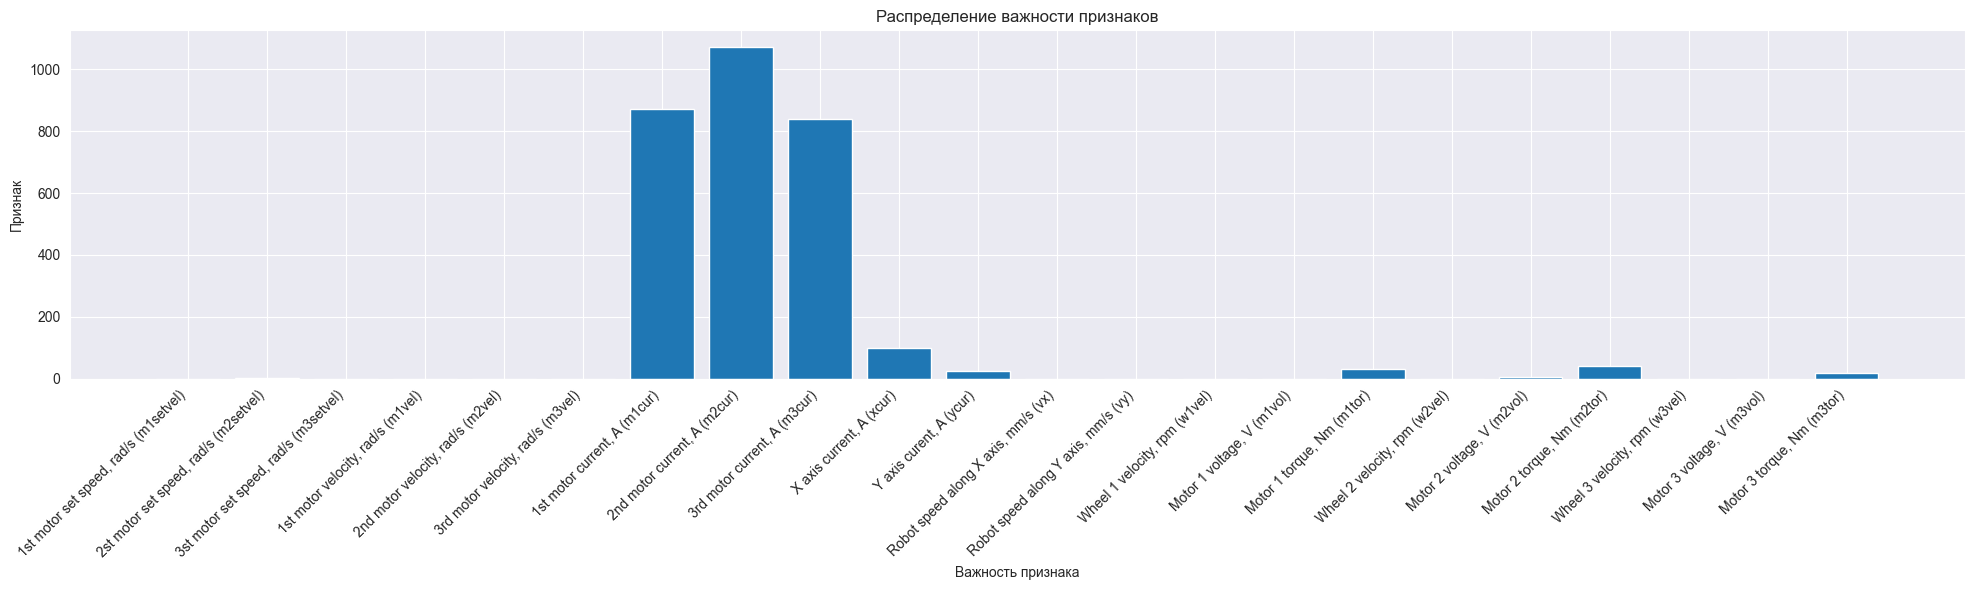

In [259]:
#Предсказание тока вращения (LightGBMR)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

data = df_com_2
data = data.drop(columns=["surface"])

# Целевой параметр
parametr = "Rotational current, A (rotcur)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

# Выбор 3 случайных строк для теста
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

# Удаляем тестовые строки из обучающих данных
data = data.drop(index=random_indices)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))
X_train = X_scaled
y_train = data[parametr]

# Модель LightGBM
model = lightgbm.LGBMRegressor(
    objective='regression',
    metric='rmse',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
)
model.fit(X_train, y_train)

# Масштабирование тестовых данных
X_test_rows_scaled = scaler.transform(X_test_rows)

# Предсказание
predicted_params = model.predict(X_test_rows_scaled)

# Оценка качества предсказаний
for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    if actual_param != 0:
        accuracy = (1 - abs(difference) / actual_param) * 100
        if accuracy > 100:
            accuracy = 100 - (accuracy - 100)
        print("Точность предсказания: {:.2f}%".format(accuracy))
        print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))
    else:
        print("Точность не может быть рассчитана (деление на ноль)")

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

# Важность признаков
feature_importances = model.feature_importances_
feature_names = X.columns  # Имена признаков (из исходного DataFrame)

plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,
    ha='right',
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.tight_layout()  # Чтобы подписи не обрезались
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2950
[LightGBM] [Info] Number of data points in the train set: 40035, number of used features: 22
[LightGBM] [Info] Start training from score 0.004853


H:\NeuroBludniak\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Тестовая строка 1:
Предсказанный параметр: 0.44662363340759637
Фактический параметр: 0.6206752694817417
Разность между предсказанным и фактическим значением: -0.1740516360741453
Точность предсказания: 71.96%
Процентное соотношение предсказанного к фактическому: 71.96%
Средняя абсолютная ошибка (MAE): 0.17
Средняя квадратичная ошибка (MSE): 0.03
Корень из средней квадратичной ошибки (RMSE): 0.17

Тестовая строка 2:
Предсказанный параметр: -0.371125096842809
Фактический параметр: -0.32748735375126936
Разность между предсказанным и фактическим значением: -0.043637743091539616
Точность предсказания: 86.67%
Процентное соотношение предсказанного к фактическому: 113.33%
Средняя абсолютная ошибка (MAE): 0.04
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.04

Тестовая строка 3:
Предсказанный параметр: -0.5609654745426387
Фактический параметр: -0.6107920445261612
Разность между предсказанным и фактическим значением: 0.04982656998352253
Точность предсказан

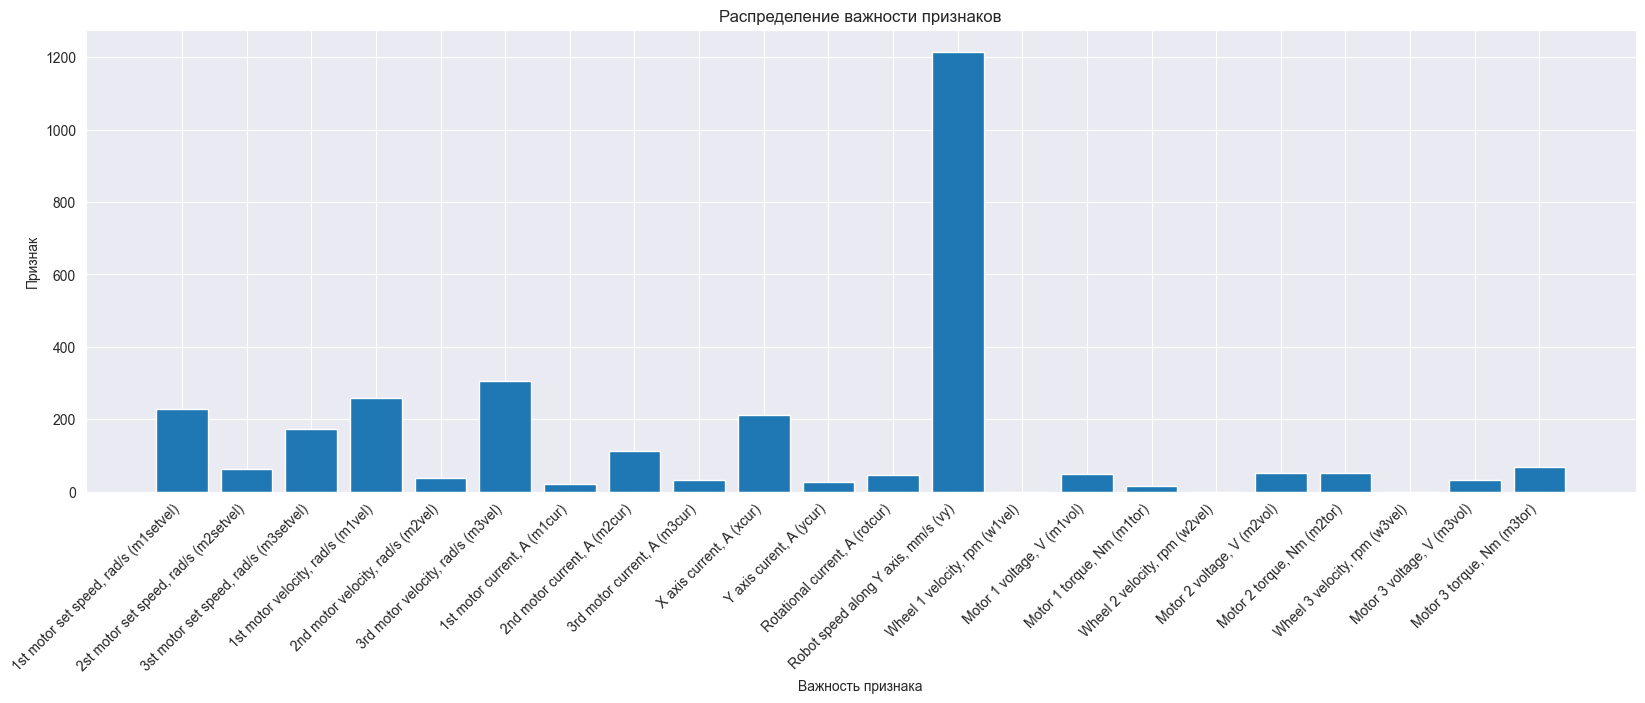

In [260]:
#Предсказание скорости (LightGBMR)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

data = df_com_2

data = data.drop(columns=["surface"])

#Целевой параметр
parametr = "Robot speed along X axis, mm/s (vx)"



X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))

X_train, y_train = X_scaled, data[parametr]
model = lightgbm.LGBMRegressor(objective='regression', metric='rmse', num_leaves=31, learning_rate=0.05, n_estimators=100)
model.fit(X_train, y_train)

X_test_rows_scaled = scaler.transform(X_test_rows)

predicted_params = model.predict(X_test_rows_scaled)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

feature_importances = model.feature_importances_
feature_names = X.columns # Имена признаков

plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances) # Выводим горизонтальную диаграмму
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2950
[LightGBM] [Info] Number of data points in the train set: 40035, number of used features: 22
[LightGBM] [Info] Start training from score 0.013155


H:\NeuroBludniak\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Тестовая строка 1:
Предсказанный параметр: -0.14281195474742525
Фактический параметр: -0.14773731843182525
Разность между предсказанным и фактическим значением: 0.004925363684399997
Точность предсказания: 96.67%
Процентное соотношение предсказанного к фактическому: 96.67%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 2:
Предсказанный параметр: -0.3351236546820458
Фактический параметр: -0.3304263864323298
Разность между предсказанным и фактическим значением: -0.004697268249716002
Точность предсказания: 98.58%
Процентное соотношение предсказанного к фактическому: 101.42%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: -0.21133734905847876
Фактический параметр: -0.22107018398991418
Разность между предсказанным и фактическим значением: 0.009732834931435425
Точность пре

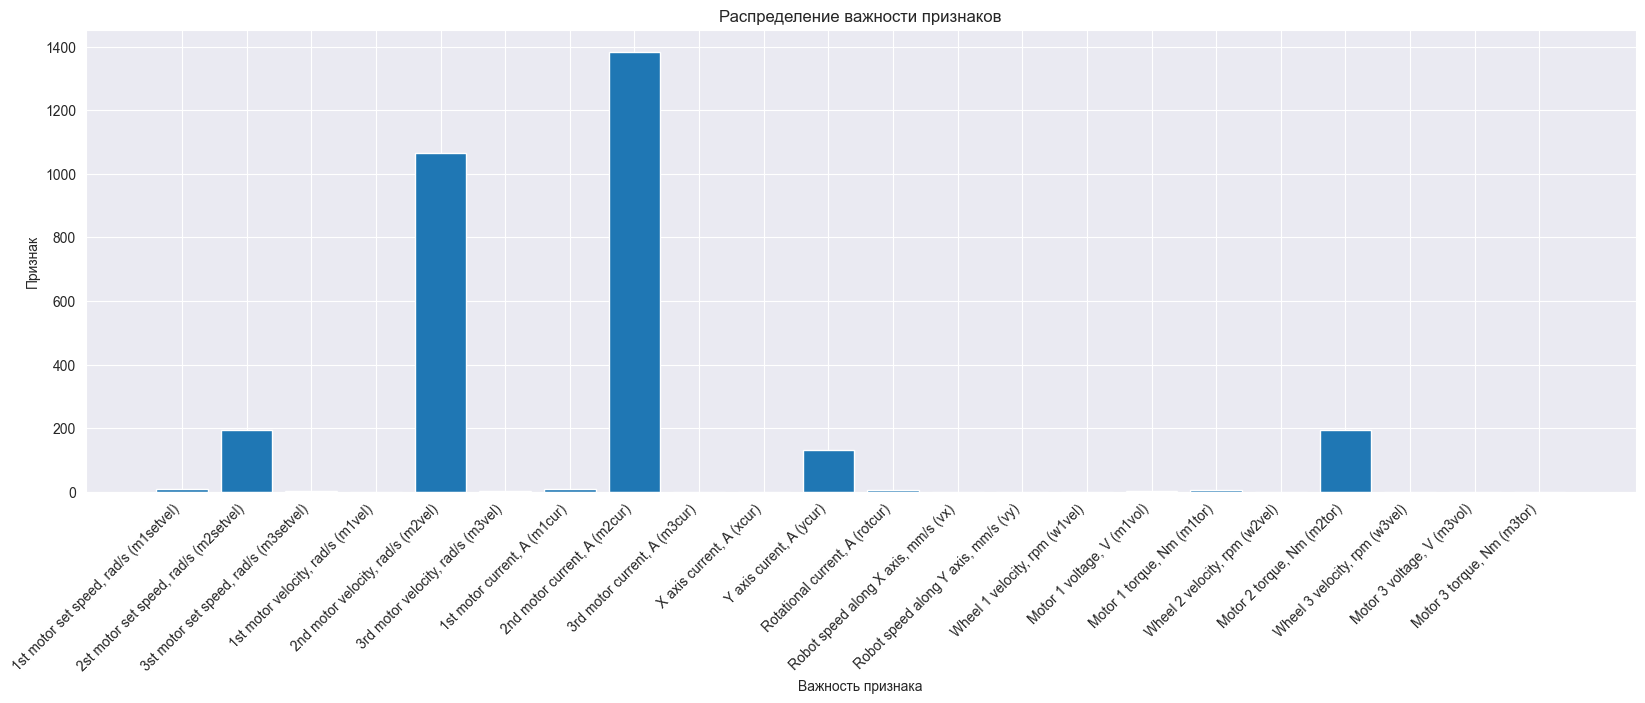

In [261]:
#Предсказание напряжения на двигателе 2 (LightGBMR)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

data = df_com_2

data = data.drop(columns=["surface"])

#Целевой параметр
parametr = "Motor 2 voltage, V (m2vol)"



X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

#Выбор 3 строк
random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]

data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]))

X_train, y_train = X_scaled, data[parametr]
model = lightgbm.LGBMRegressor(objective='regression', metric='rmse', num_leaves=31, learning_rate=0.05, n_estimators=100)
model.fit(X_train, y_train)

X_test_rows_scaled = scaler.transform(X_test_rows)

predicted_params = model.predict(X_test_rows_scaled)

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

feature_importances = model.feature_importances_
feature_names = X.columns # Имена признаков

plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importances) # Выводим горизонтальную диаграмму
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.xticks(
    rotation=45,  # Поворот подписей на 45 градусов
    ha='right',   # Выравнивание по правому краю
    fontsize=10
)
plt.title("Распределение важности признаков")
plt.show()

Нейронная сеть

In [262]:
#Предсказание тока вращения (Нейронная сеть)
data = df_com_2

data = data.drop(columns=["surface"])

parametr = "Rotational current, A (rotcur)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]


data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]).values)
X_test_rows_scaled = scaler.transform(X_test_rows.values)

X_train, y_train = X_scaled, data[parametr].values
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False)

predicted_params = model.predict(X_test_rows_scaled).flatten()

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))


H:\NeuroBludniak\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Тестовая строка 1:
Предсказанный параметр: -0.14519574
Фактический параметр: -0.14634247263346534
Разность между предсказанным и фактическим значением: 0.0011467351523480884
Точность предсказания: 99.22%
Процентное соотношение предсказанного к фактическому: 99.22%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 2:
Предсказанный параметр: 0.02481843
Фактический параметр: 0.024388747474516803
Разность между предсказанным и фактическим значением: 0.000429682248865193
Точность предсказания: 98.24%
Процентное соотношение предсказанного к фактическому: 101.76%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: 0.31689805
Фактический параметр: 0.3170708390882009
Разность между предсказанным и фактическим значением: -0.0001727911641591362
Т

In [263]:
#Предсказание скорости (Нейронная сеть)
data = df_com_2

data = data.drop(columns=["surface"])

parametr = "Robot speed along X axis, mm/s (vx)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]


data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]).values)
X_test_rows_scaled = scaler.transform(X_test_rows.values)

X_train, y_train = X_scaled, data[parametr].values
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False)

predicted_params = model.predict(X_test_rows_scaled).flatten()

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

H:\NeuroBludniak\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Тестовая строка 1:
Предсказанный параметр: 0.46047804
Фактический параметр: 0.6206752694817417
Разность между предсказанным и фактическим значением: -0.16019723188599277
Точность предсказания: 74.19%
Процентное соотношение предсказанного к фактическому: 74.19%
Средняя абсолютная ошибка (MAE): 0.16
Средняя квадратичная ошибка (MSE): 0.03
Корень из средней квадратичной ошибки (RMSE): 0.16

Тестовая строка 2:
Предсказанный параметр: -0.45034626
Фактический параметр: -0.32748735375126936
Разность между предсказанным и фактическим значением: -0.12285890751162432
Точность предсказания: 62.48%
Процентное соотношение предсказанного к фактическому: 137.52%
Средняя абсолютная ошибка (MAE): 0.12
Средняя квадратичная ошибка (MSE): 0.02
Корень из средней квадратичной ошибки (RMSE): 0.12

Тестовая строка 3:
Предсказанный параметр: -0.5849523
Фактический параметр: -0.6107920445261612
Разность между предсказанным и фактическим значением: 0.025839749699653636
Точно

In [264]:
#Предсказание напряжения на двигателе 2 (Нейронная сеть)
data = df_com_2

data = data.drop(columns=["surface"])

parametr = "Motor 2 voltage, V (m2vol)"

X = data.drop(columns=[parametr])
y = data[parametr]

seed = 42
np.random.seed(seed)

random_indices = np.random.choice(data.index, size=3, replace=False)
test_rows = data.loc[random_indices]
X_test_rows = test_rows.drop(columns=[parametr])
y_test_rows = test_rows[parametr]


data = data.drop(index=random_indices)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=[parametr]).values)
X_test_rows_scaled = scaler.transform(X_test_rows.values)

X_train, y_train = X_scaled, data[parametr].values
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False)

predicted_params = model.predict(X_test_rows_scaled).flatten()

for i in range(len(test_rows)):
    actual_param = y_test_rows.iloc[i]
    predicted_param = predicted_params[i]
    difference = predicted_param - actual_param
    percentage = (predicted_param / actual_param) * 100 if actual_param != 0 else None

    print(f"Тестовая строка {i + 1}:")
    print("Предсказанный параметр:", predicted_param)
    print("Фактический параметр:", actual_param)
    print("Разность между предсказанным и фактическим значением:", difference)

    accuracy = (1 - abs(difference) / actual_param) * 100
    if accuracy > 100:
      accuracy = 100 - (accuracy - 100)
    print("Точность предсказания: {:.2f}%".format(accuracy))
    print("Процентное соотношение предсказанного к фактическому:", "{:.2f}%".format(percentage))

    y_pred_single = np.array([predicted_param])
    y_actual_single = np.array([actual_param])

    mae = mean_absolute_error(y_actual_single, y_pred_single)
    mse = mean_squared_error(y_actual_single, y_pred_single)
    rmse = np.sqrt(mse)

    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
    print("Средняя квадратичная ошибка (MSE): {:.2f}".format(mse))
    print("Корень из средней квадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("")

r2_total = r2_score(y_test_rows, predicted_params)
print("Коэффициент детерминации (R²) для всего тестового набора: {:.2f}".format(r2_total))

H:\NeuroBludniak\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Тестовая строка 1:
Предсказанный параметр: -0.1480442
Фактический параметр: -0.14773731843182525
Разность между предсказанным и фактическим значением: -0.0003068803196243364
Точность предсказания: 99.79%
Процентное соотношение предсказанного к фактическому: 100.21%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 2:
Предсказанный параметр: -0.3306759
Фактический параметр: -0.3304263864323298
Разность между предсказанным и фактическим значением: -0.00024951355012259313
Точность предсказания: 99.92%
Процентное соотношение предсказанного к фактическому: 100.08%
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из средней квадратичной ошибки (RMSE): 0.00

Тестовая строка 3:
Предсказанный параметр: -0.22162178
Фактический параметр: -0.22107018398991418
Разность между предсказанным и фактическим значением: -0.000551597597686